<img src ='logo_poule.png' width='400' align='center' />

<div>

<p> <h1 style='margin: auto; padding: 20px; color: RGB(74,63,53); text-align: center; '>Étude de marché</h1>
<h2 style='margin: auto; padding: 20px; color: RGB(74,63,53); text-align: center; '>Développement à l'international</h2>
<h4 style="margin: auto; padding: 0px ; color: RGB(74,63,53); text-align: center">Inès KHALDI - Data Analyst - OC 2023 - 2024</h4> 
    </p>
</div>

<div>
<p> <h2 style='margin: auto; padding: 20px; color: RGB(251,4,1); text-align: center; '> - Clustering et visualisations - </h2> </p>
</div>

------

# <div style="border: 1px solid RGB(251,4,1);" >
<h1 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Contexte <a class='anchor' id='contexte'></a> 
</h1> 

**La poule qui chante**, entreprise française d'agroalimentaire souhaite se développer à l'international. 

Pour réussir ce lancement, en tant que Data Analyst je vais réaliser une analyse afin de sélectionner les pays à cibler pour l'exportation des poulets. 

------

# <div style="border: 1px solid RGB(251,4,1);" >
<h1 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Démarche <a class='anchor' id='demarche'></a> 
</h1> 

Dans ce deuxième notebook, nous allons réaliser un clustering. 

Le clustering va nous permettre de partititonner les données c'est-à-dire créer des groupes de pays nous permettant de réduire notre dataframe et ainsi étudier les caractéristiques du centroïde (pays "moyen") de chaque groupe plutôt que chaque pays individuellement.

Il y a deux approches, réaliser une ACP puis un clustering ou l'inverse. 

- **ACP puis clustering :** on réalise un clustering sur des données projetées à dans un espace de dimensions réduites  déterminé par l'ACP. -> Perte d'informations. 

- **Clustering puis ACP :** on réalise un clustering sur l'ensemble des données (plusieurs dimensions) puis utilisation de l'ACP pour réduire la dimensionnalité. -> Pas de perte d'informations et visualisation plus simple. 

Dans notre cas, nous allons utiliser la deuxième approche. 

---

La démarche est la suivante : 
- Importation des librairies et du fichier final nettoyé
- Clustering via 2 méthodes et comparaison : 
    - Méthode de Classification Ascendante Hiérarchique (CAH) : dendogramme
    - Méthode des K-Means
- Sélection des pays pour exportation

#### *Notebook 1 - Préparation - Nettoyage - Analyse Exploratoire*

* *Partie 1 - *
* *Partie 2 - *
* *Partie 3 - *
* *Partie 4 - *


----

# <div style="border: 1px solid RGB(251,4,1);" >
<h1 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Sommaire <a class='anchor' id='sommaire'></a> 
</h1> 

# <div style="border: 1px solid RGB(251,4,1);" >
<h1 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Importation des librairies et du fichier final <a class='anchor' id='importation-des-librairies-et-du-fichier-final'></a> 
</h1> 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA

from sklearn import cluster, metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

sns.set ()

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_final = pd.read_csv('df_final_acp.csv', index_col=0)

In [3]:
df_final.head()

,Population,TAS,TDI,Exportations - Qté,Production,PIB / hab ($),Dispo. Alim. Volailles (kcal/pers),Prop. Prot. Volailles (%) / jour,Evolution population (%),Stabilité Politique,Croissance PIB (%),Prix à la Conso
Zone,,,,,,,,,,,,
Albanie,2884169.0,27.66,80.85,0.0,13.0,4521.752217,31025.0,9.44,-0.22,0.38,9.77,107.31
Antigua-et-Barbuda,95426.0,0.00,100.00,0.0,0.0,16110.556281,85045.0,32.88,1.99,0.75,2.19,101.72
Autriche,8819901.0,85.55,63.58,78.0,148.0,47429.535841,23725.0,11.54,1.63,1.05,5.48,103.12
Bahamas,381755.0,23.08,92.31,0.0,6.0,30969.876197,66430.0,34.79,2.02,0.99,4.42,98.93
Botswana,2205080.0,71.43,42.86,0.0,5.0,6705.339802,4380.0,4.50,3.98,1.02,6.78,106.20


In [4]:
df_final.shape

(59, 12)

# <div style="border: 1px solid RGB(251,4,1);" >
<h1 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Clustering via 2 méthodes <a class='anchor' id='clustering-via-2-methodes'></a> 
</h1> 

Ce qu'on recherche pour **définir nos clusters** c'est **minimiser la variance intraclasse**, c'est-à-dire que nos clusters soient **le plus rapproché possible**. 

À l'inverse, pour **distinguer chaque cluster**, on cherche à **maximiser la variance interclasse**, c'est-à-dire que nos clusters soient **le plus éloigné possible**. 

## 
<h2 style="margin: auto; padding: 20px; color: RGB(251,4,1); ">
I. Méthode de Classification Ascendante Hiérarchique (CAH) <a class='anchor' id='I.-methode-de-classification-ascendante-hierarchique-cah'></a> </h2>

###
---
<h3 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
ACP <a class='anchor' id='acp'></a> </h3>

In [5]:
#Centrage et réduction
X = df_final.values
pays = df_final.index
features = df_final.columns

In [6]:
#Instancie
scaler = StandardScaler()

#On fit
scaler.fit(X)

#Calcul des données transformées 
X_scaled = scaler.transform(X)

In [7]:
#ACP
#Travail sur les 6 premières composantes
n_components = 6

#Instanciation de l'ACP
pca = PCA(n_components=n_components)

#Appliquer l'objet pca aux données scalées
X_proj = pca.fit_transform(X_scaled)

In [8]:
scree = pd.DataFrame(
    {
        "Composantes" : ["F" + str(x + 1) for x in range(n_components)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
scree

,Composantes,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,F1,3.077477,25.0,25.0
1,F2,2.150251,18.0,43.0
2,F3,1.454199,12.0,55.0
3,F4,1.380779,11.0,66.0
4,F5,1.267077,10.0,76.0
5,F6,1.006221,8.0,85.0


###
---
<h3 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Linkage <a class='anchor' id='linkage'></a> </h3>

On utilise le clustering de Ward qui permet de mesurer l'homogénéïté des clusters grâce à la variance intraclasse (qui doit être minimale). 

In [9]:
Z = linkage(X_scaled, method='ward')

###
---
<h3 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Dendrogramme <a class='anchor' id='dendrogramme'></a> </h3>

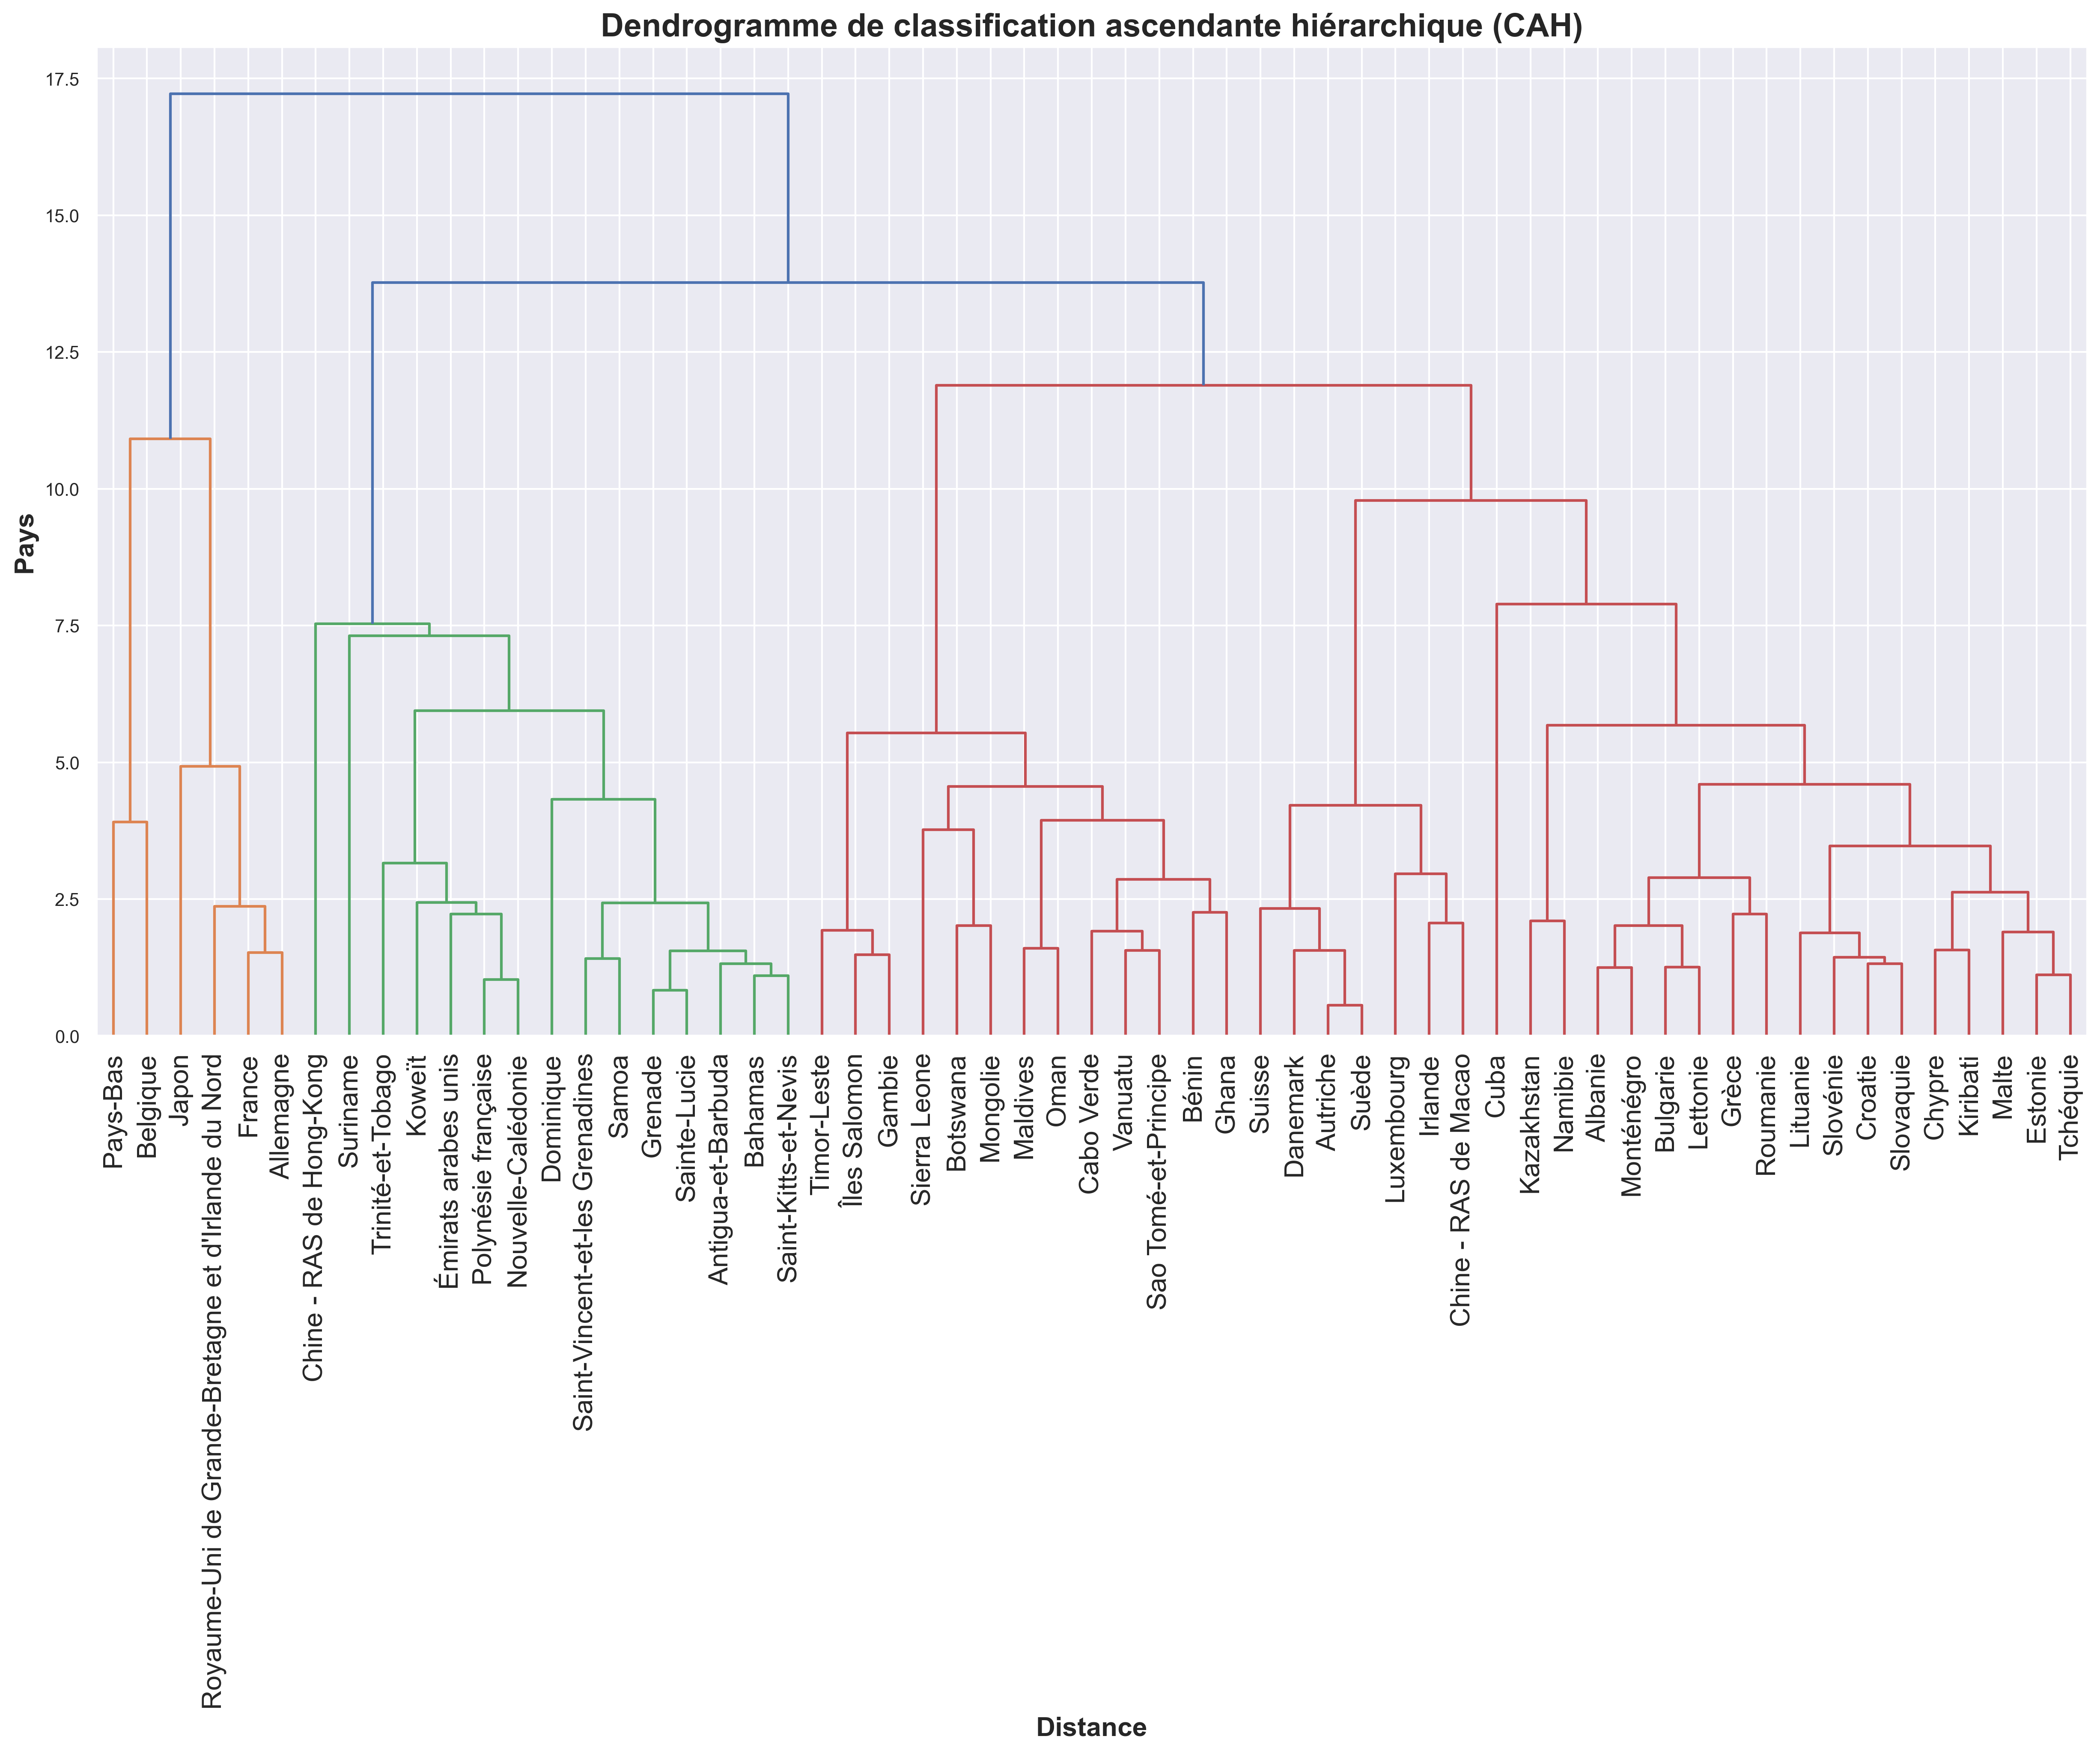

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20,10), dpi=300)

_ = dendrogram(Z, ax=ax, labels=pays, orientation = 'top')

plt.title('Dendrogramme de classification ascendante hiérarchique (CAH)', fontsize=18, fontweight='bold')
ax.set_xlabel('Distance', fontsize=15, fontweight='bold')
ax.set_ylabel('Pays', fontsize=15, fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

for label in ax.get_yticklabels():
    label.set_fontsize(10)

---
On observe une augmentation des distances entre 7.5 et 11 : on peut donc visualiser les clusters à partir de la hauteur 10. Tous les clusters au-dessus de cette ligne seront considérés comme des clusters distincts. 

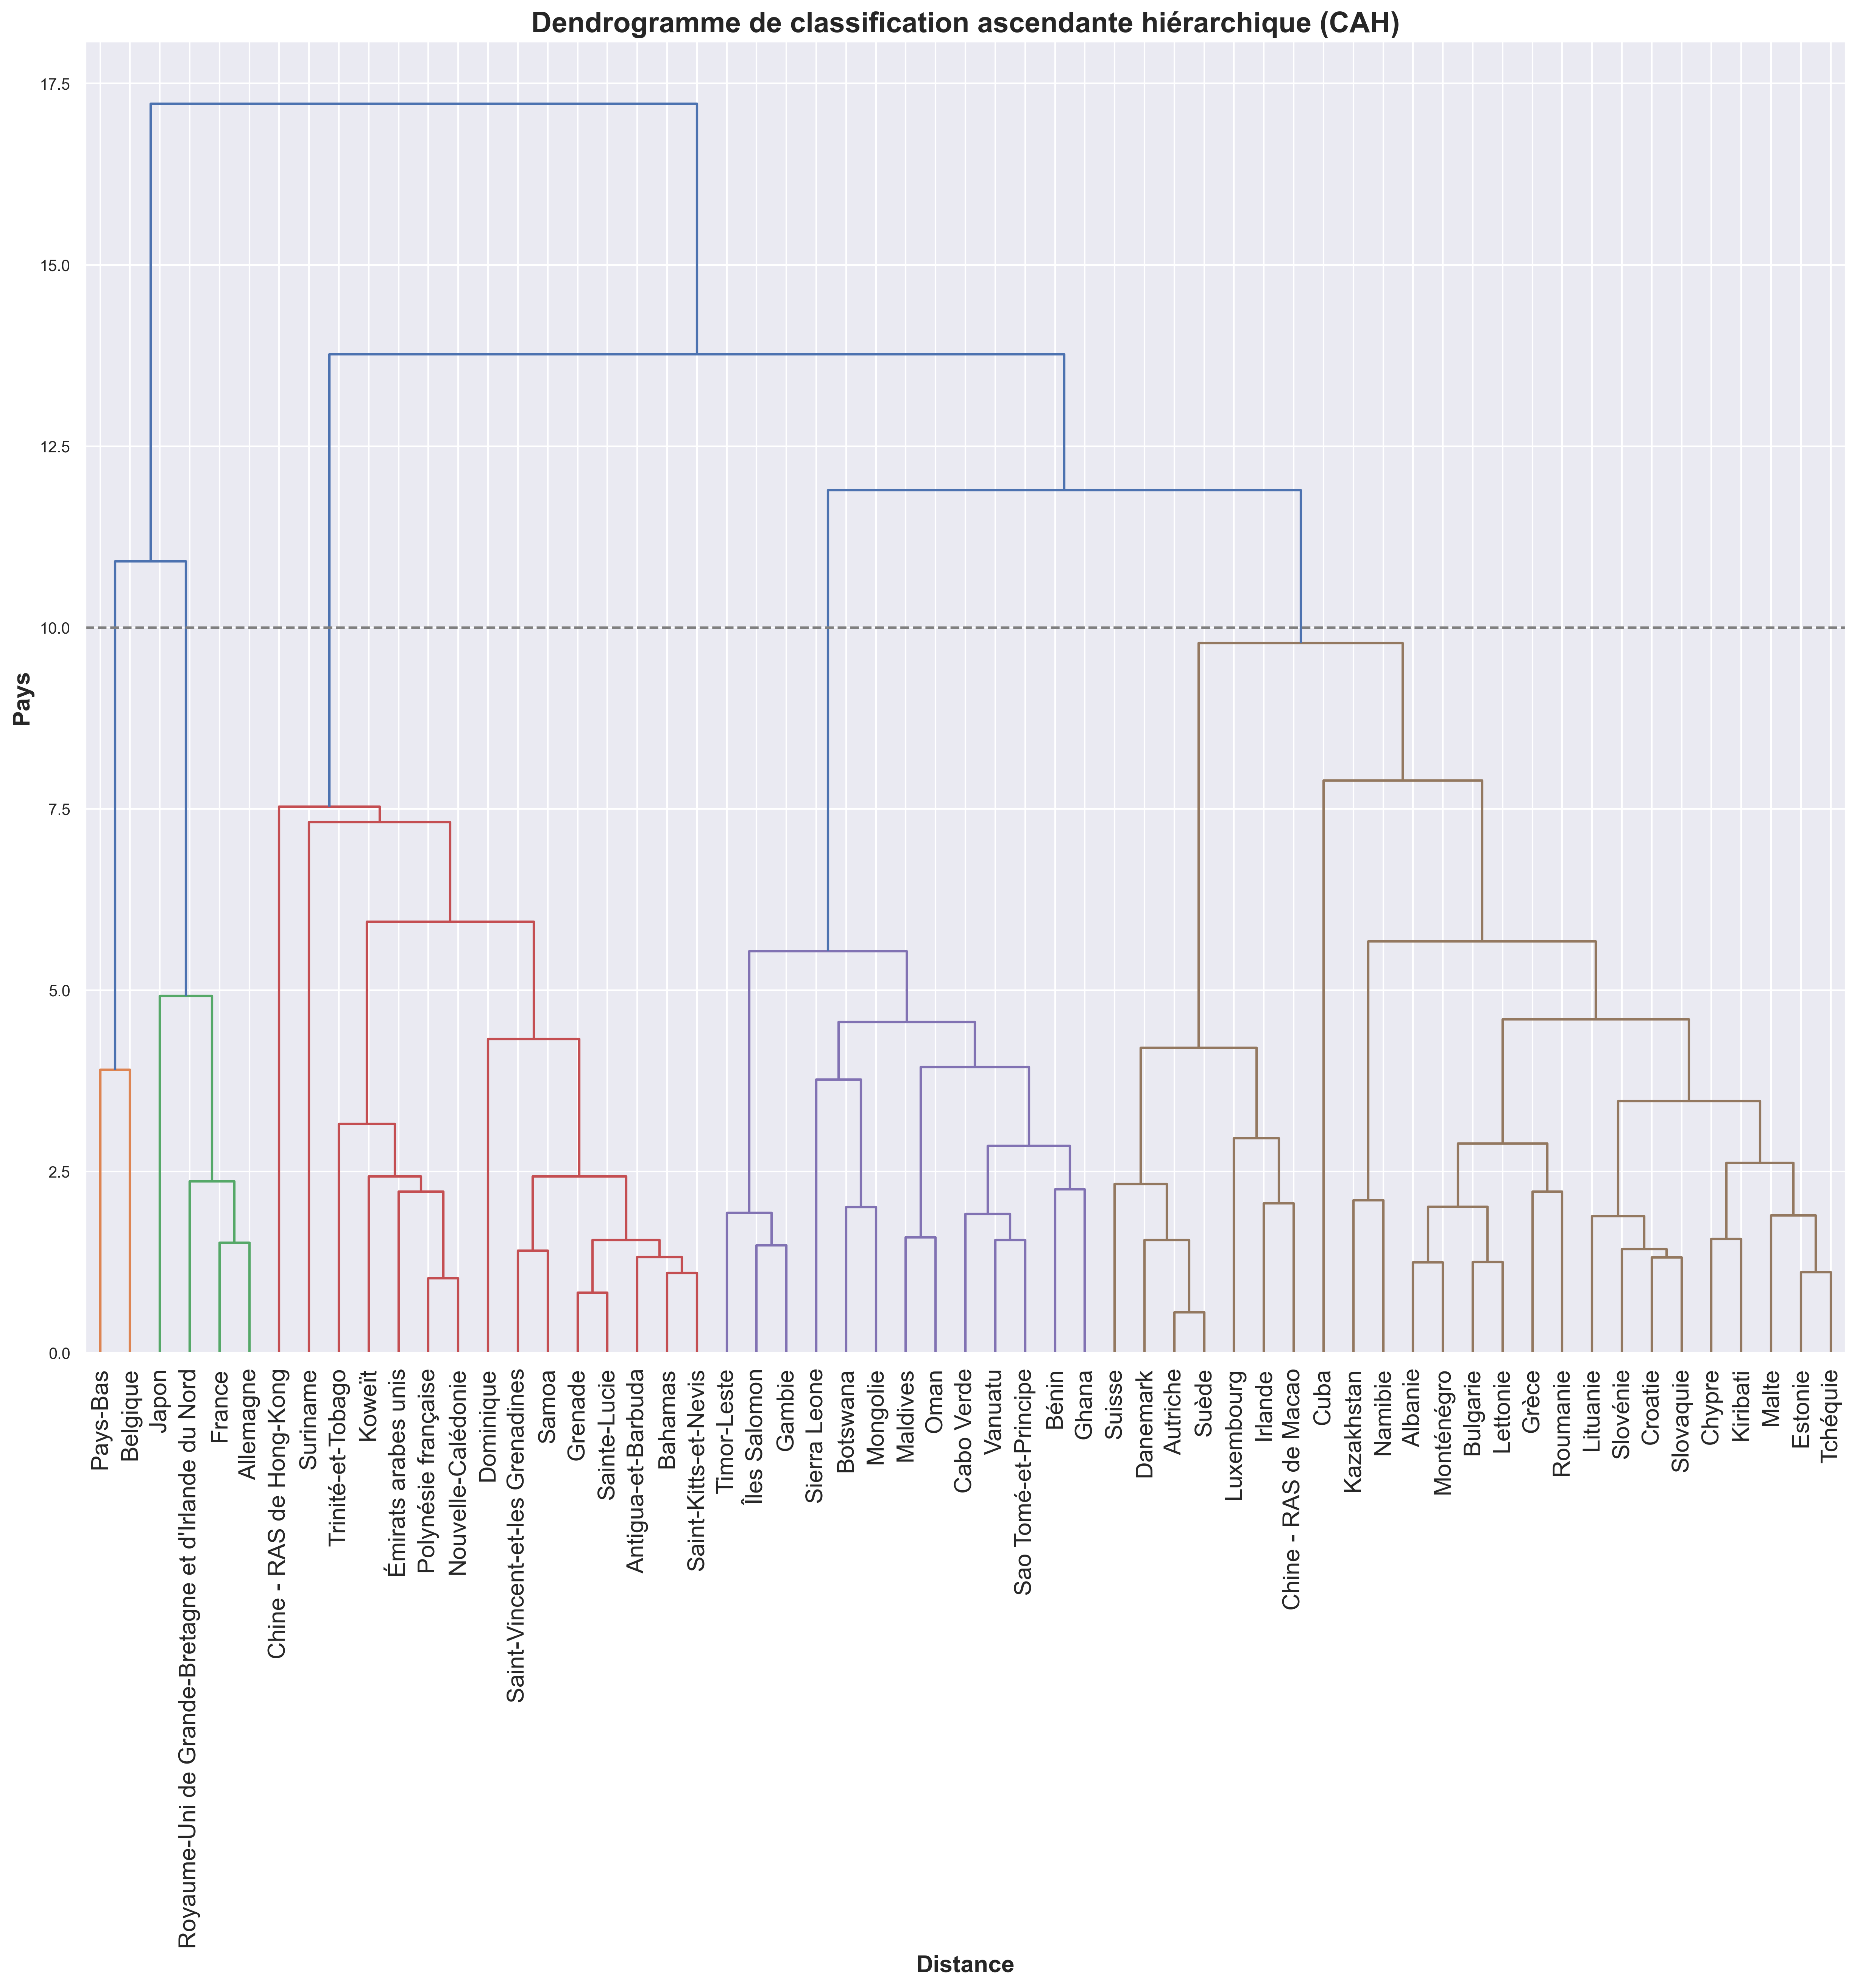

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(20,15), dpi=300)
#Matérialisation des clusters à partir de la hauteur 10
_ = dendrogram(Z, ax=ax, labels=pays, orientation = 'top', color_threshold=10)

plt.axhline(y=10, color='grey', linestyle='--')

plt.title('Dendrogramme de classification ascendante hiérarchique (CAH)', fontsize=18, fontweight='bold')
ax.set_xlabel('Distance', fontsize=15, fontweight='bold')
ax.set_ylabel('Pays', fontsize=15, fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

for label in ax.get_yticklabels():
    label.set_fontsize(10)

---
On obtient donc 5 clusters. Pour encore plus de visibilité, on peut afficher que les 5 clusters grâce à dendrogramme tronqué. 

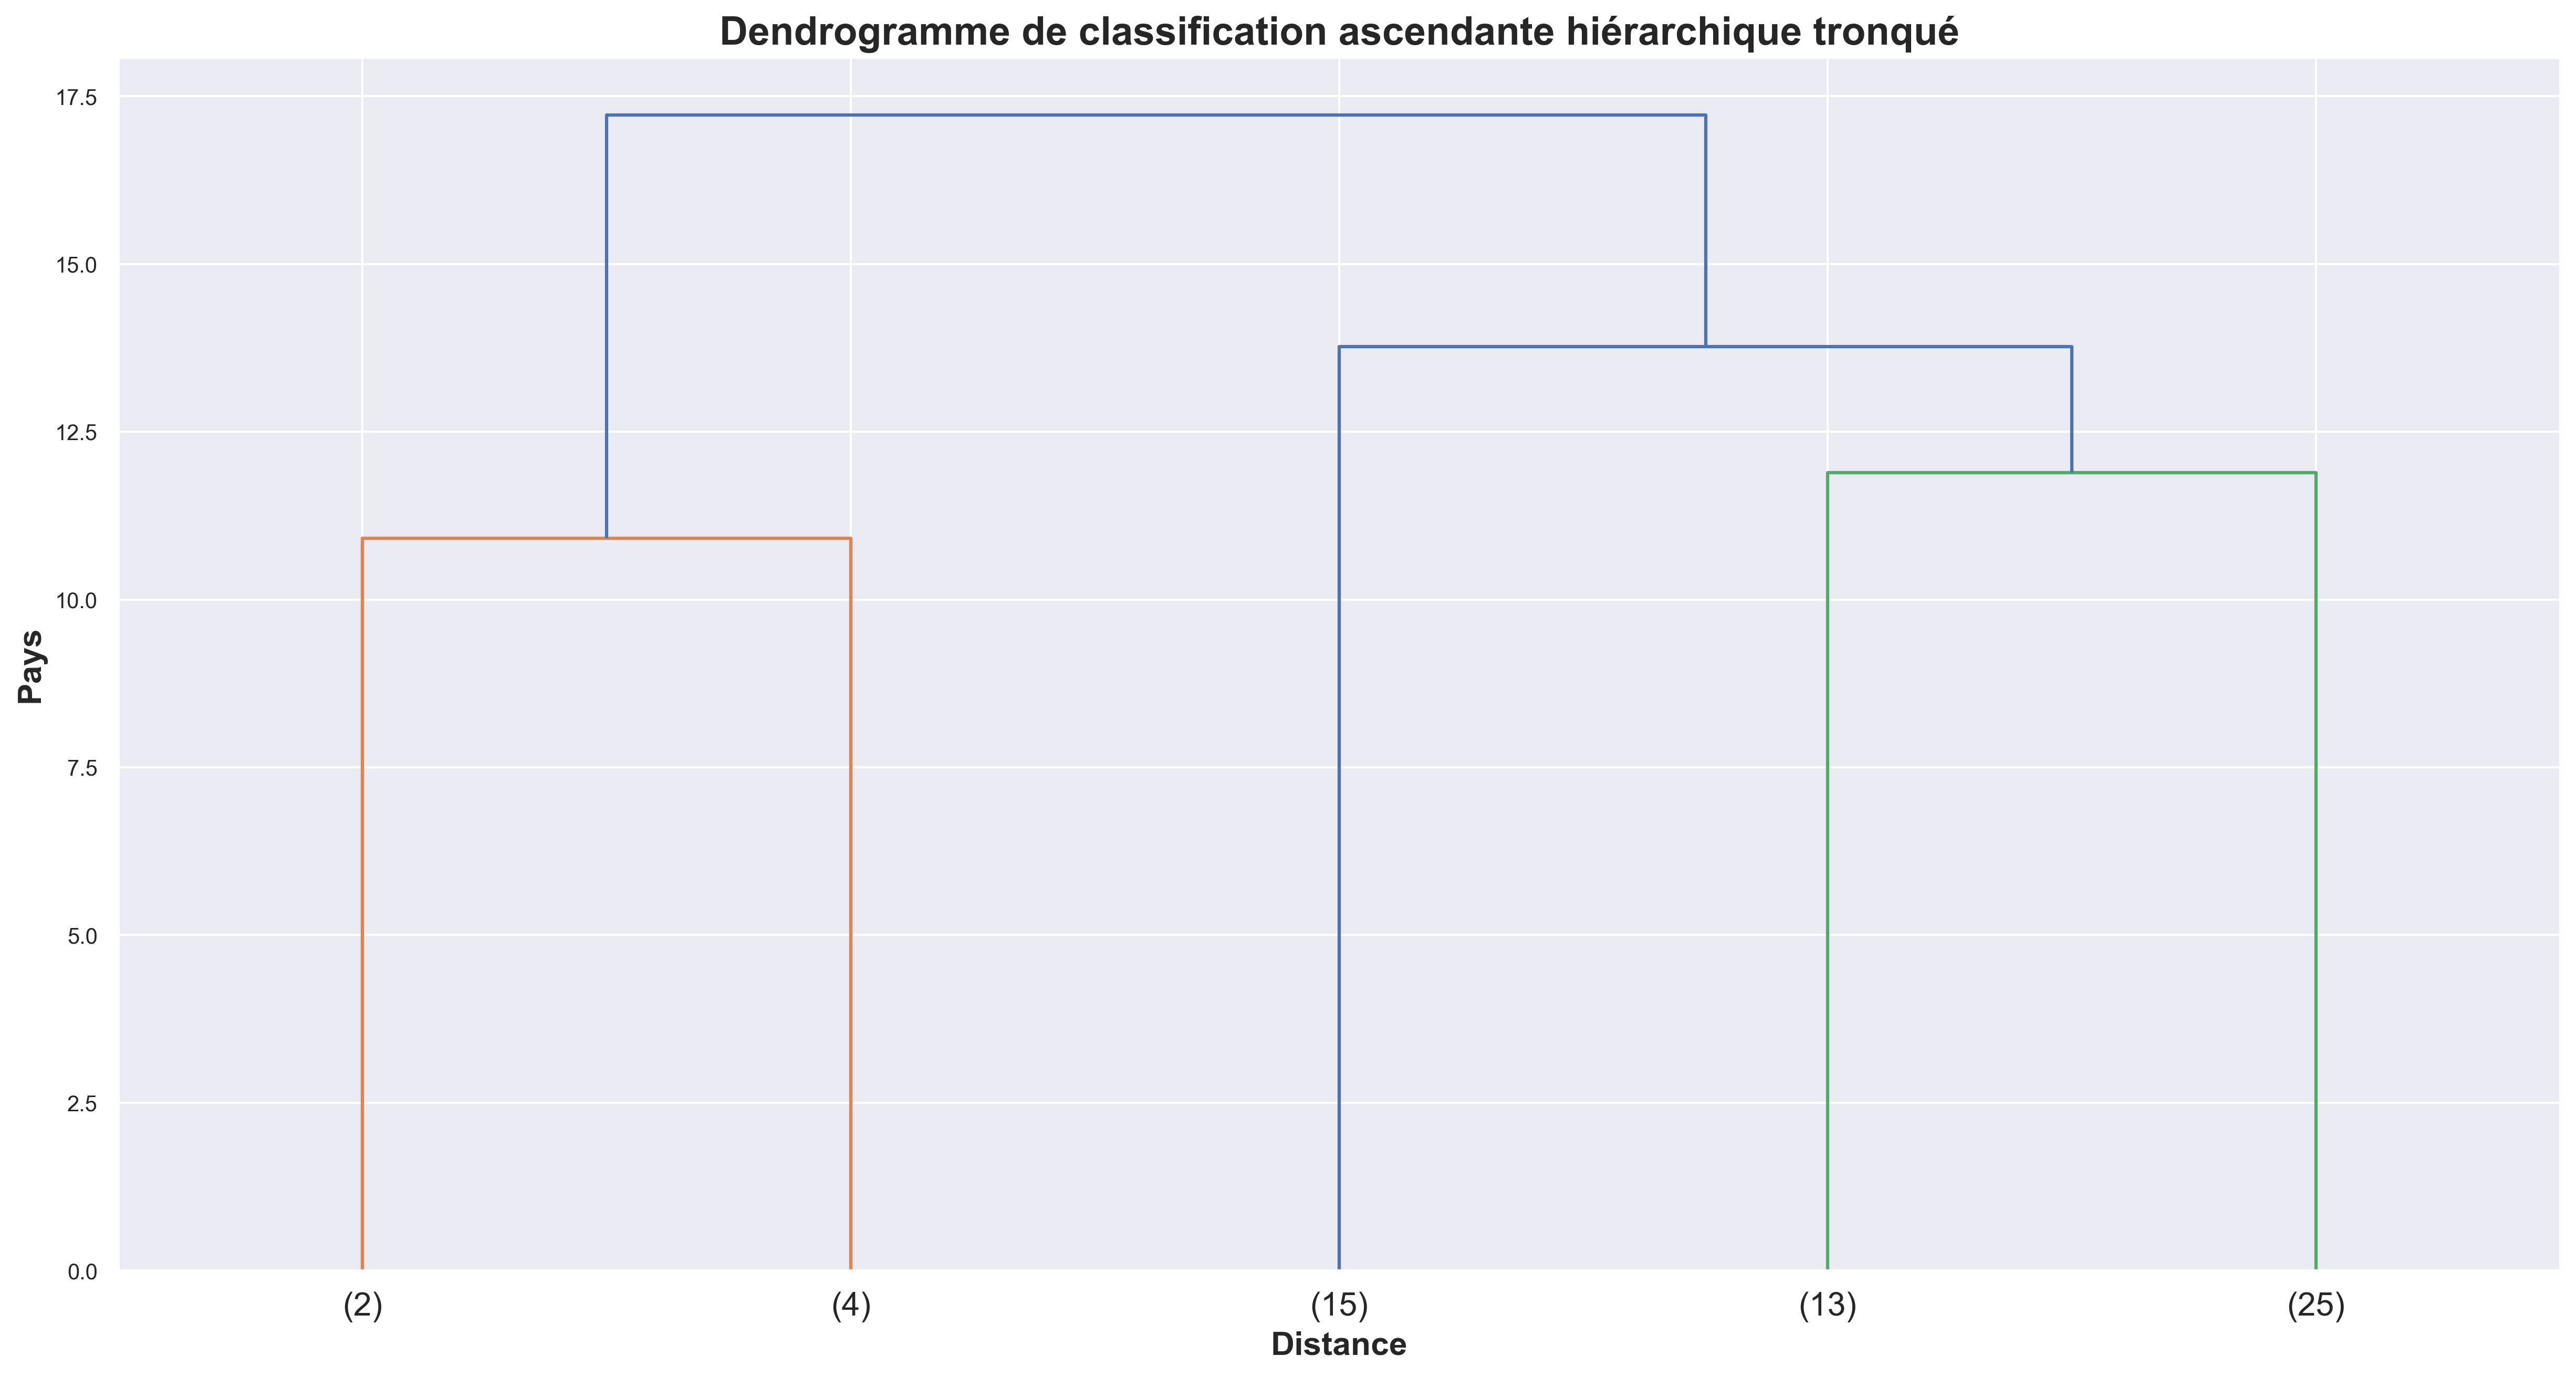

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,10), dpi=300)

#Dendrogramme limité à 5 clusters
_ = dendrogram(Z, truncate_mode='lastp', p = 5, ax=ax)

plt.title('Dendrogramme de classification ascendante hiérarchique tronqué', fontsize=18, fontweight='bold')
ax.set_xlabel('Distance', fontsize=15, fontweight='bold')
ax.set_ylabel('Pays', fontsize=15, fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

for label in ax.get_yticklabels():
    label.set_fontsize(10)

###
---
<h3 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Clusters <a class='anchor' id='clusters'></a> </h3>

On définit nos clusters avec scipy. 

In [13]:
#Définition du nombre de clusters 
k = 5

In [14]:
clus_cah = fcluster(Z, k, criterion='maxclust')

####
---
**Attribution des 5 clusters aux pays**

In [15]:
print(df_final.columns)

Index(['Population', 'TAS', 'TDI', 'Exportations - Qté', 'Production',
       'PIB / hab ($)', 'Dispo. Alim. Volailles (kcal/pers)',
       'Prop. Prot. Volailles (%) / jour', 'Evolution population (%)',
       'Stabilité Politique', 'Croissance PIB (%)', 'Prix à la Conso'],
      dtype='object')


In [16]:
# Index triés des groupes de pays
index = np.argsort(clus_cah)

# Création d'un df avec les pays et leur cluster
df_clus_cah = pd.DataFrame(columns=['Cluster_CAH', 'Zone'])
df_clus_cah['Zone'] = df_final.reset_index()['Zone'].iloc[index] 
df_clus_cah['Cluster_CAH'] = clus_cah[index]
df_clus_cah.head()

,Cluster_CAH,Zone
35,1,Pays-Bas
56,1,Belgique
26,2,Japon
17,2,Allemagne
54,2,Royaume-Uni de Grande-Bretagne et d'Irlande du...


In [17]:
# Liste des pays de chaque cluster
for i in range(1, k + 1):
    cluster_pays = df_clus_cah.loc[df_clus_cah['Cluster_CAH'] == i, df_clus_cah.columns[1]]
    print('CAH - Cluster ' + str(i) + ': ' + str(len(cluster_pays)) + ' pays')
    print(cluster_pays.values)
    print('-' * 100)

CAH - Cluster 1: 2 pays
['Pays-Bas' 'Belgique']
----------------------------------------------------------------------------------------------------
CAH - Cluster 2: 4 pays
['Japon' 'Allemagne' "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
 'France']
----------------------------------------------------------------------------------------------------
CAH - Cluster 3: 15 pays
['Chine - RAS de Hong-Kong' 'Grenade' 'Nouvelle-Calédonie'
 'Saint-Kitts-et-Nevis' 'Sainte-Lucie' 'Polynésie française'
 'Trinité-et-Tobago' 'Dominique' 'Koweït' 'Émirats arabes unis' 'Samoa'
 'Saint-Vincent-et-les Grenadines' 'Bahamas' 'Antigua-et-Barbuda'
 'Suriname']
----------------------------------------------------------------------------------------------------
CAH - Cluster 4: 13 pays
['Sierra Leone' 'Sao Tomé-et-Principe' 'Maldives' 'Timor-Leste' 'Gambie'
 'Ghana' 'Oman' 'Bénin' 'Cabo Verde' 'Îles Salomon' 'Botswana' 'Vanuatu'
 'Mongolie']
-----------------------------------------------------------

In [18]:
#Jointure entre df final et df des clusters
df_final_cah = pd.merge(df_final, df_clus_cah, on='Zone')

#Export
df_final_cah.to_csv('df_final_clus_cah.csv')
df_final_cah.head()

,Zone,Population,TAS,TDI,Exportations - Qté,Production,PIB / hab ($),Dispo. Alim. Volailles (kcal/pers),Prop. Prot. Volailles (%) / jour,Evolution population (%),Stabilité Politique,Croissance PIB (%),Prix à la Conso,Cluster_CAH
0,Albanie,2884169.0,27.66,80.85,0.0,13.0,4521.752217,31025.0,9.44,-0.22,0.38,9.77,107.31,5
1,Antigua-et-Barbuda,95426.0,0.00,100.00,0.0,0.0,16110.556281,85045.0,32.88,1.99,0.75,2.19,101.72,3
2,Autriche,8819901.0,85.55,63.58,78.0,148.0,47429.535841,23725.0,11.54,1.63,1.05,5.48,103.12,5
3,Bahamas,381755.0,23.08,92.31,0.0,6.0,30969.876197,66430.0,34.79,2.02,0.99,4.42,98.93,3
4,Botswana,2205080.0,71.43,42.86,0.0,5.0,6705.339802,4380.0,4.50,3.98,1.02,6.78,106.20,4


###
---
<h3 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Visualisations des clusters <a class='anchor' id='visualisations-des-clusters'></a> </h3>

####
---
**Boxplots des variables par cluster**

In [19]:
df_box_cah = df_final_cah.sort_values('Cluster_CAH')

def boxplot_cluster(var):
    data_boxplot = []
    groupes = df_box_cah['Cluster_CAH'].unique()
    
    for groupe in groupes :
        subset = df_box_cah[df_box_cah.Cluster_CAH == groupe]
        data_boxplot.append(subset[var])

    fig, ax1 = plt.subplots(figsize=(8, 6))
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data_boxplot, notch=0, vert=1, whis=1.5)

    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.4)
    ax1.set_axisbelow(True)
    ax1.set_title(("Méthode CAH : Distribution de " + var +" par Cluster"), fontsize=12, fontweight='bold')
    ax1.set_ylabel(var)
    ax1.set_xlabel("Clusters CAH")
    ax1.set_xlim(0, len(data_boxplot) + 0.5)

    plt.show()

#####
**Evolution population (%)**

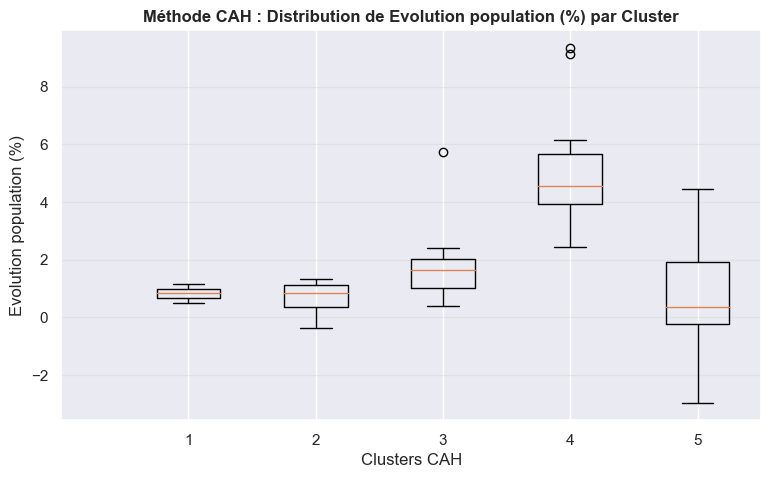

In [20]:
boxplot_cluster('Evolution population (%)')    

Les **clusters 3 et 4** ont une médiane plus élevée concernant l'évolution de la population. 

Ils ont donc une **bonne croissance démographique** en comparaison avec les autres clusters. 

#####
**Population**

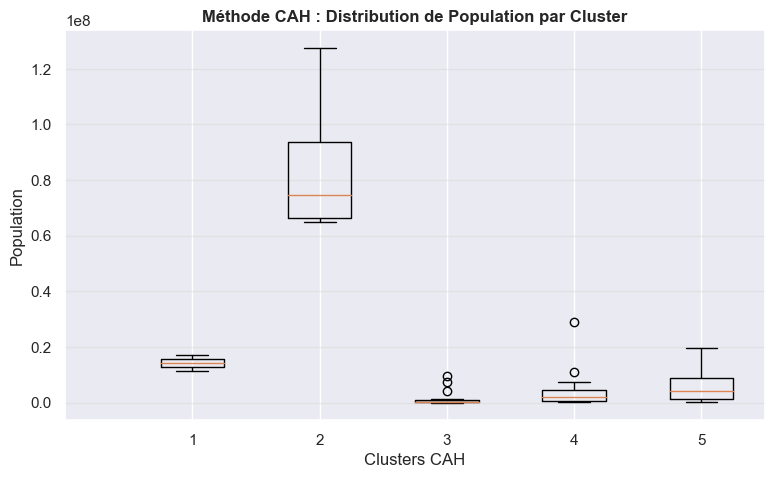

In [21]:
boxplot_cluster('Population')    

Le **cluster 2** est le plus peuplé. 

#####
**Disponibilité alimentaire volailles**

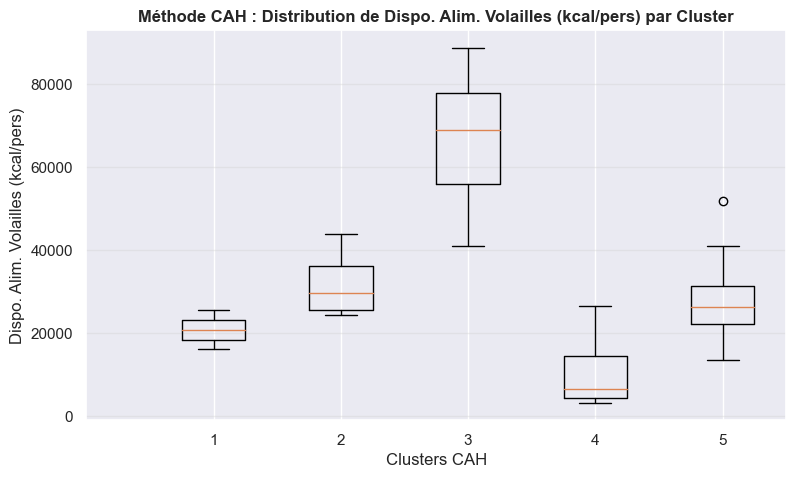

In [22]:
boxplot_cluster('Dispo. Alim. Volailles (kcal/pers)')    

Concernant la disponibilité alimentaire nous pouvons viser différents clusters : 

**Dispo alim. élevée - Avantages :**
- **Clusters 2 et 3 :** demande existante qui représente une forte consommation de volailles, connaissance des produits de volailles par la population.

**Dispo alim. faible - Avantages :** 
- **Clusters 1, 4 et 5 :** opportunité de croissance qui peut être dû à un marché sous-exploité.

#####
**PIB / hab ($)**

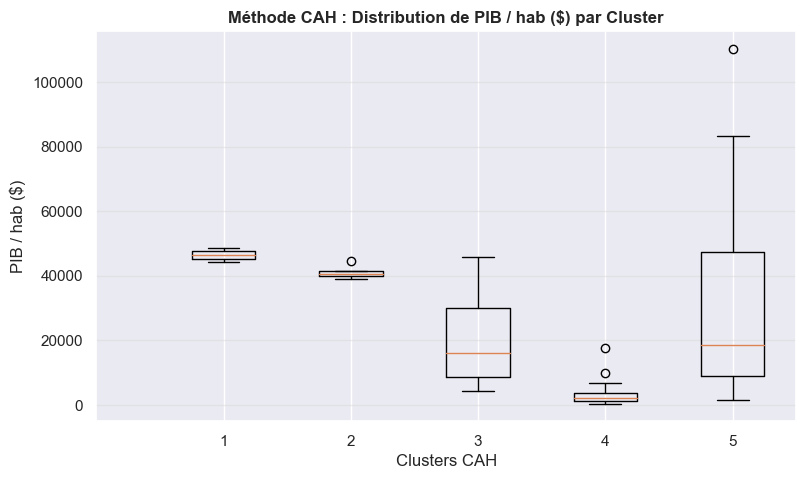

In [23]:
boxplot_cluster('PIB / hab ($)')    

Les habitants ayant le **meilleur niveau de vie** se trouvent dans les **clusters 1 et 2**. 

#####
**Exportations**

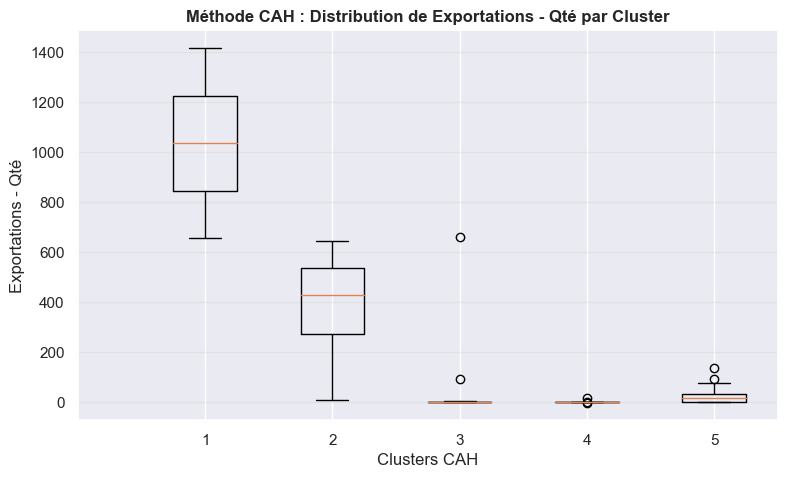

In [24]:
boxplot_cluster('Exportations - Qté')    

- Pays les **plus exportateurs** : **clusters 1 et 2**
- Pays les **moins exportateurs** : **clusters 3, 4 et 5**

#####
**TDI**

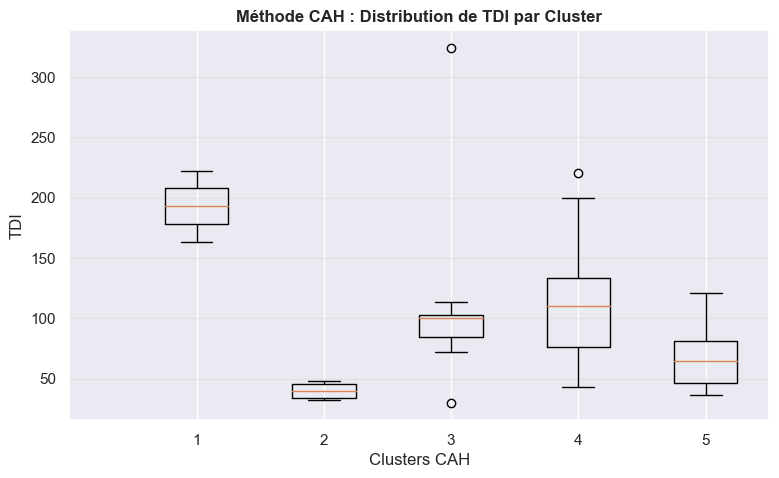

In [25]:
boxplot_cluster('TDI')    

Les pays qui **dépendent le plus des importations de volailles** se trouvent dans le **cluster 1**. Plus loin les **clusters 3 et 4** sont également concernés avec TDI supérieur à 100%.

#####
**TAS**

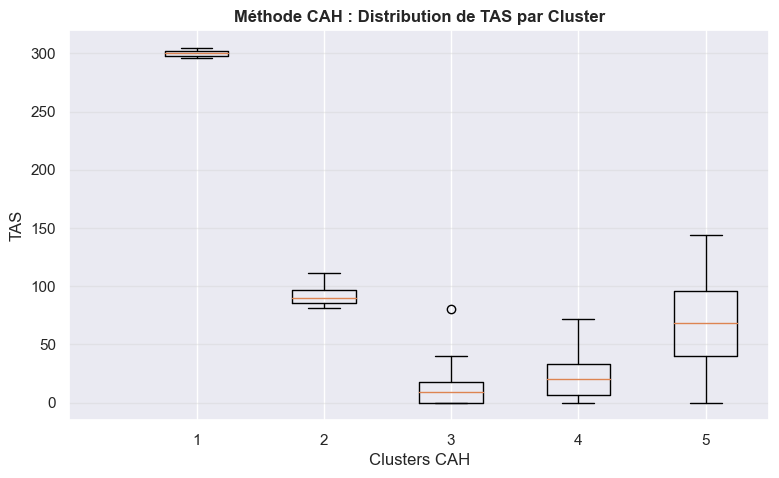

In [26]:
boxplot_cluster('TAS')    

Les pays **autosuffisants** en volailles sont dans les **clusters 1 et 2**. Ceux qui le **sont peu ou pas** sont dans les **clusters 3 et 4**. 

#####
**Production**

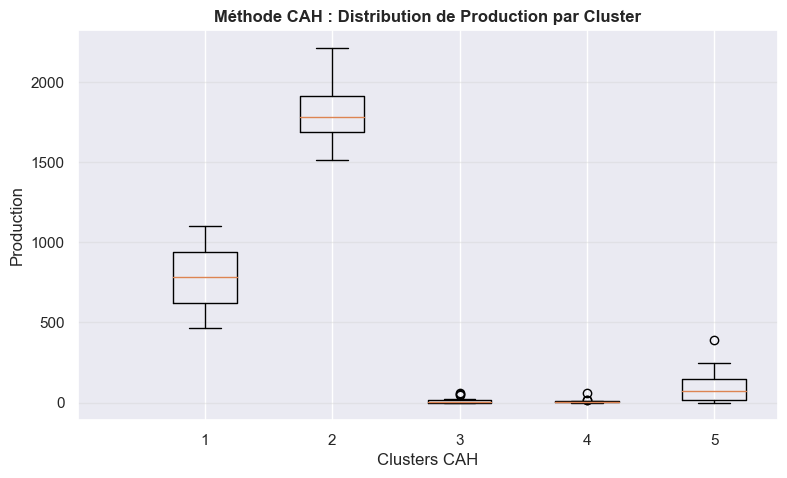

In [27]:
boxplot_cluster('Production')    

Les pays qui **produisent le plus de volailles** sont dans le **cluster 1** en tête suivi du **cluster 2**. Contrairement aux **clusters 3 et 4** qui n'en **produisent pas**. 

#####
<div style="background-color: RGB(255,245,240); width: 100%; padding: 10px; border: 2px solid RGB(251,4,1); color: RGB(74,63,53);">
    
**OBSERVATIONS**

À première vue, grâce aux **boxplots**, nous souhaitons exporter vers des pays qui : 
    
- sont assez peuplés : cluster **2** 
- ont une bonne croissance démographique : clusters **3 et 4**
- ont une grande disponibilité alimentaire : cluster **3**
- ont une faible disponibilité alimentaire : cluster **4**
- ont une population avec un bon niveau de vie : clusters **1 et 2**
- exportent peu ou pas de volailles : clusters **3, 4 et 5**
- sont dépendants aux importations : clusters **1, 3 et 4**
- ne sont pas autosuffisants : clusters **3 et 4**
- ne produisent pas ou peu de volailles : clusters **3 et 4**
    
Les pays représentant le plus d'opportunités pour exporter les volailles sont dans les **clusters 3 et 4**. 

###
---
<h3 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Analyse des centroïdes <a class='anchor' id='analyse-des-centroides'></a> </h3>

In [28]:
#Regroupement des données par cluster et calcul de leur centroïde (moyenne)
df_centroide_cah = df_final_cah.iloc[:,:14].groupby('Cluster_CAH').mean()
df_centroide_cah

,Population,TAS,TDI,Exportations - Qté,Production,PIB / hab ($),Dispo. Alim. Volailles (kcal/pers),Prop. Prot. Volailles (%) / jour,Evolution population (%),Stabilité Politique,Croissance PIB (%),Prix à la Conso
Cluster_CAH,,,,,,,,,,,,
1,1.422055e+07,300.155000,192.905000,1037.000000,781.500000,46418.728128,20805.000000,10.140000,0.830000,0.215000,6.690000,107.265000
2,8.543278e+07,92.807500,39.932500,379.000000,1823.250000,41168.750959,31937.500000,16.027500,0.650000,0.592500,2.347500,101.962500
3,1.637008e+06,15.369333,105.476667,51.066667,13.933333,20059.260875,67281.666667,34.619333,1.732667,0.631333,4.392000,108.387333
4,4.876120e+06,24.014615,117.881538,1.230769,8.692308,4158.447049,10753.461538,13.839231,5.233846,0.363077,5.323077,107.592308
5,5.669440e+06,71.709200,67.607600,28.280000,88.920000,30044.962017,27564.800000,14.452400,0.764800,0.716000,9.549600,100.158800


In [29]:
# Centrage-réduction des variables pour analyse - utilisation du modéle déjà entraîné
df_centroide_cah = pd.DataFrame(scaler.fit_transform(df_centroide_cah.values),
                                   index = np.unique(clus_cah),
                                   columns = features )
df_centroide_cah

,Population,TAS,TDI,Exportations - Qté,Production,PIB / hab ($),Dispo. Alim. Volailles (kcal/pers),Prop. Prot. Volailles (%) / jour,Evolution population (%),Stabilité Politique,Croissance PIB (%),Prix à la Conso
1,-0.256135,1.920911,1.694762,1.874361,0.339135,1.191320,-0.566196,-0.890358,-0.582069,-1.554262,0.428362,0.655156
2,1.982817,-0.077124,-1.246459,0.202468,1.822060,0.844791,0.014021,-0.207425,-0.685572,0.478899,-1.378384,-0.929818
3,-0.651768,-0.823332,0.013767,-0.630768,-0.753492,-0.548560,1.856130,1.949173,-0.063020,0.688050,-0.527747,0.990634
4,-0.549928,-0.740024,0.252277,-0.757395,-0.760953,-1.598107,-1.090074,-0.461258,1.950221,-0.756741,-0.140362,0.752992
5,-0.524986,-0.280431,-0.714346,-0.688666,-0.646749,0.110555,-0.213881,-0.390132,-0.619560,1.144053,1.618130,-1.468964


####
**Projection des individus**

Nous allons à présent projeter les clusters sur les 3 premiers plans factoriels.

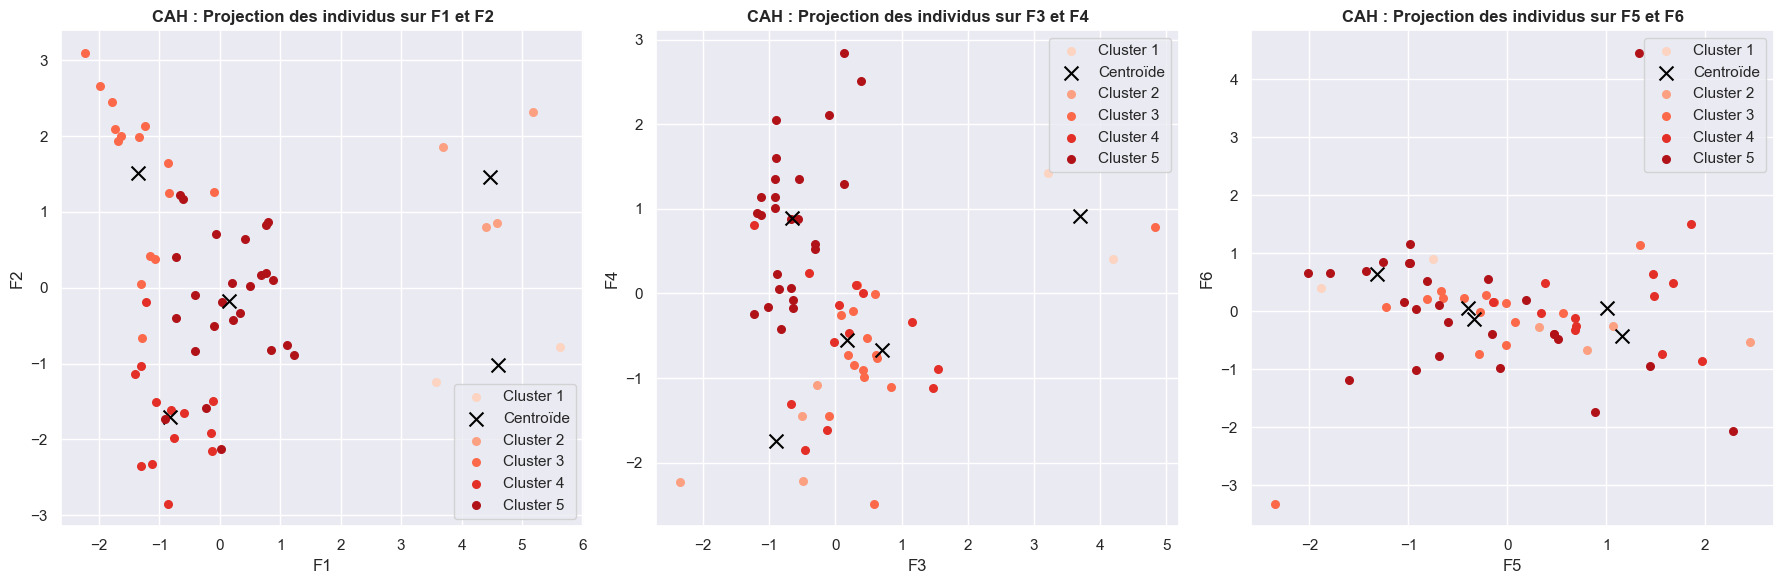

In [30]:
def plot_cah_cluster_projections(X_proj, clus_cah, palette='Reds'):
    """
    Plot cluster projections on the first three principal components.

    Parameters:
    - X_proj: projected data after PCA
    - cluster_labels: cluster labels assigned by CAH
    - palette: color palette for clusters (default is 'Reds')

    Returns:
    - None
    """

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Clusters sur les 3 premiers plans factoriels
    unique_labels = np.unique(clus_cah)
    colors = sns.color_palette(palette, len(unique_labels))

    for i, ax in enumerate(axes):
        d1, d2 = i * 2, i * 2 + 1
        
        # Plot each cluster with its specific color
        for cluster_idx, color in zip(unique_labels, colors):
            selected = clus_cah == cluster_idx
            ax.scatter(X_proj[selected, d1], X_proj[selected, d2], label=f'Cluster {cluster_idx}', color=color, s=30)

            # Plot barycenters (moyenne des points dans chaque cluster)
            barycenter = X_proj[selected].mean(axis=0)
            ax.scatter(barycenter[d1], barycenter[d2], c='black', marker='x', s=100, label='' if cluster_idx != unique_labels[0] else "Centroïde")

        # Set labels and title
        ax.set_xlabel(f'F{d1+1}')
        ax.set_ylabel(f'F{d2+1}')
        ax.set_title(f'CAH : Projection des individus sur F{d1+1} et F{d2+1}', fontsize=12, fontweight='bold')

    # Add custom legend for centroids
    for ax in axes:
        handles, labels = ax.get_legend_handles_labels()
        if "Centroïde" not in labels:
            handles.append(plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='black', markersize=10, label='Centroïde'))
            labels.append('Centroïde')
        ax.legend(handles, labels)

    plt.tight_layout()
    plt.show()

# Utilisation de la fonction
plot_cah_cluster_projections(X_proj, clus_cah)

<div style="background-color: RGB(255,245,240); width: 100%; padding: 10px; border: 2px solid RGB(251,4,1); color: RGB(74,63,53);">
    
>**Premier plan factoriel - Pays cibles :** Clusters 3 et 5 

>**Deuxième plan factoriel - Pays cibles :** Cluster 1

>**Troisième plan factoriel - Pays cibles :** Cluster4 

####
**Heatmap**

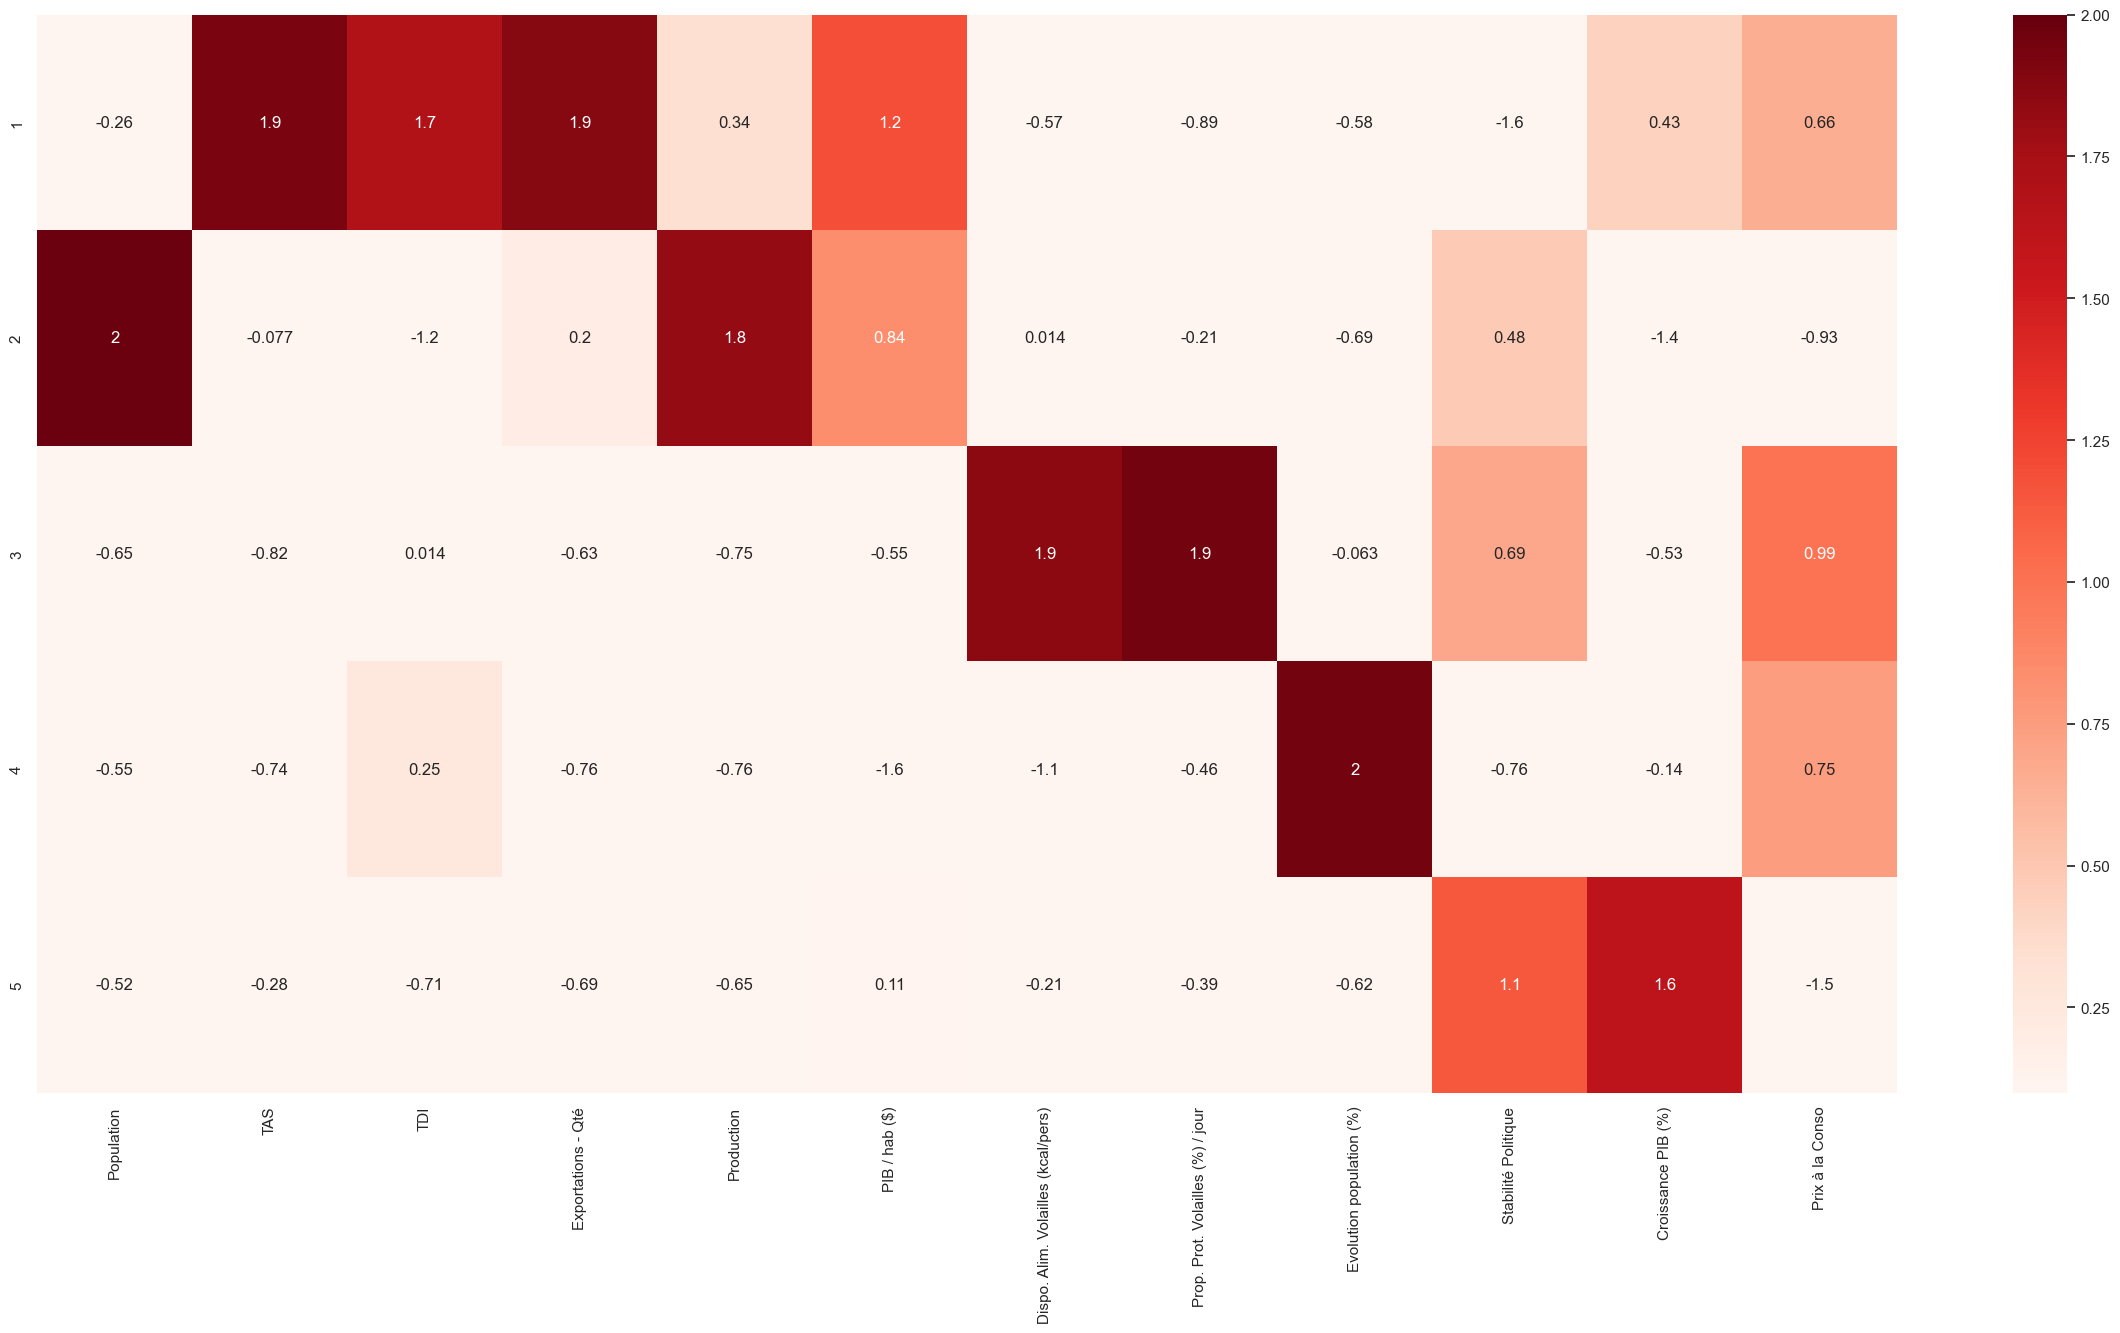

In [31]:
fig, ax = plt.subplots(1,1, figsize=(30,14))
ax = sns.heatmap(df_centroide_cah, vmin=0.1, vmax=2, annot=True, cmap="Reds")

<div style="background-color: RGB(255,245,240); width: 100%; padding: 10px; border: 2px solid RGB(251,4,1); color: RGB(74,63,53);">
    
**OBSERVATIONS**

**Cluster 1 :** 
- Centroïde élevé dans : TAS, TDI, Exportations et PIB / hab
- Centroïde faible dans : Prop. Prot. Volailles et Stabilité politique
    
**Cluster 2 :** 
- Centroïde élevé dans : Population, Production et PIB / hab
- Centroïde faible dans : TDI et Croissance PIB
    
**Cluster 3 :** 
- Centroïde élevé dans : Dispo. Alim. Volailles, Prop. Prot. Volailles et Prix à la Conso
- Centroïde faible dans : TAS et Production
    
**Cluster 4 :** 
- Centroïde élevé dans : Évolution population
- Centroïde faible dans : PIB / hab et Dispo. Alim. Volailles
    
**Cluster 5 :** 
- Centroïde élevé dans : Stabilité politique et Croissance PIB
- Centroïde faible dans : TDI et Prix à la Conso

####
**Radar plot**

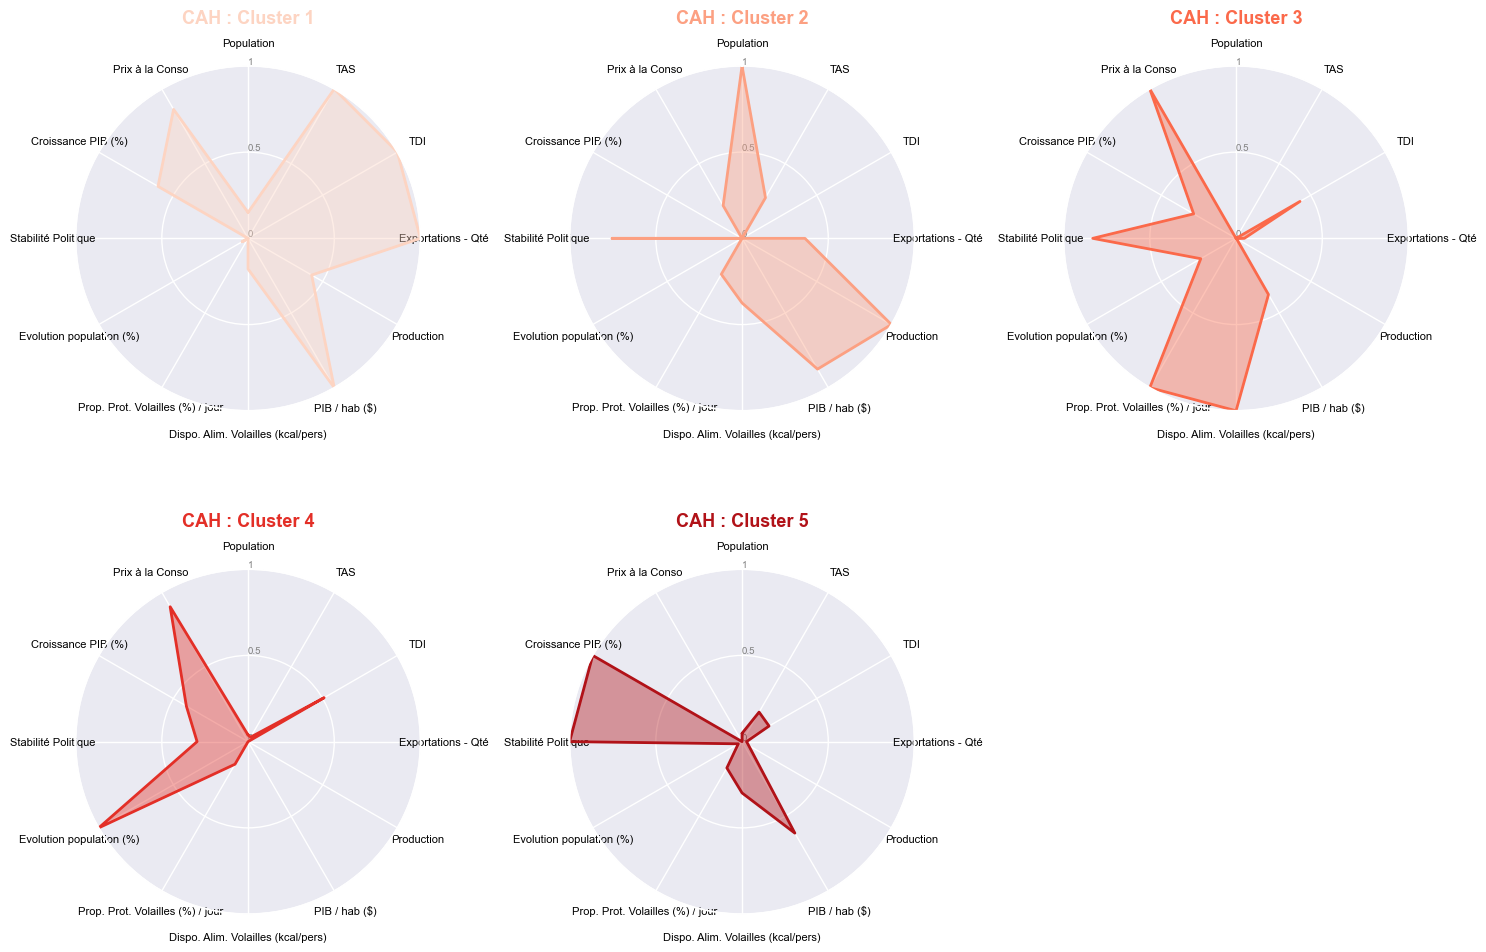

In [32]:
data = df_centroide_cah.reset_index()
data = data.rename(columns={'index':'Cluster'})

# Normalisation des données
data_normalized = (data.iloc[:, 1:] - data.iloc[:, 1:].min()) / (data.iloc[:, 1:].max() - data.iloc[:, 1:].min())


plt.figure(figsize=(15, 15))
colors= sns.color_palette('Reds', len(data.index))

# Nombre de variables
categories = list(data_normalized.columns)
N = len(categories)

# Angles pour chaque axe
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Boucle pour tracer les graphes pour chaque cluster
for i in range(len(data_normalized)):
    ax = plt.subplot(3, 3, i + 1, polar=True)  # Ajuster les subplots selon le nombre de clusters
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], categories, color='black', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([0, 0.5, 1], ["0", "0.5", "1"], color="grey", size=7)
    plt.ylim(0, 1)

    values = data_normalized.iloc[i].values.flatten().tolist()
    values += values[:1]
    
    ax.plot(angles, values, color=colors[i], linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=colors[i], alpha=0.4)

    plt.title('CAH : Cluster ' + str(data['Cluster'][i]), weight='bold', size=13, color=colors[i], y=1.1)

plt.tight_layout()
plt.show()

**OBSERVATIONS**

---

| Cluster | Nb Pays | Population |Évol. Pop. | Autosuffisance | Dépendance Import. | Export. | Production | Consommation | PIB | Croissance PIB | Conclusion |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
| **1** | 2 | **+** | **-** | **+++** | **+++** | **+++** | **++** | **+** | **+++** | **++** | **NON** : Autosuffisants, exportateurs et  producteurs |
| **2** | 4 | **+++** | **-** | **+** | **-** | **+** | **+++** | **++** | **+++** | **-** | **NON** : Autosuffisants, exportateurs et producteurs |
| **3** | 15 | **-** | **+** | **-** | **++** | **-** | **-** | **+++**| **++** | **+** | **OUI** : TDI, grande consommation de volailles, bon niveau de vie et croissance économique |
| **4** | 13 | **-** | **++** | **-** | **++** | **-** | **-** | **-** | **-** | **++** | **OUI** : TDI, population en évolution et croissance économique |
| **5** | 25 | **-** | **-** | **+** | **+** | **-** | **-** | **+** | **++** | **+++** | **OUI** : TDI malgré légère autosuffisance, consommation volailles, bon niveau de vie et croissance économique |


###
---
<h3 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Sélection des pays via CAH <a class='anchor' id='selection-des-pays-via-cah'></a> </h3>

<div style="background-color: RGB(255,245,240); width: 100%; padding: 10px; border: 2px solid RGB(251,4,1); color: RGB(74,63,53);">

Les pays les plus intéressants pour exporter les poulets sont ceux figurant dans les clusters suivants : 

**Cluster 3 : 15 pays**
- Pays  dépendants des importations de volailles, on peut y répondre en exportant. 
- Pays ayant une forte consommation de volailles, il y a donc une demande existante.
- Pays en croissance économique et ayant une population avec un bon niveau de vie. C'est une opportunité pour se développer. 
    
**[Chine - RAS de Hong-Kong, Grenade, Nouvelle-Calédonie, Saint-Kitts-et-Nevis, Sainte-Lucie, Polynésie française, Trinité-et-Tobago, Dominique, Koweït, Émirats arabes unis, Samoa, Saint-Vincent-et-les Grenadines, Bahamas, Antigua-et-Barbuda, Suriname]**

** **
    
**Cluster 4 : 13 pays**    
- Pays dépendants des importations de volailles, on peut y répondre en exportant. 
- Pays ayant une bonne croissance démographique (évolution de la population). 
- Pays avec une faible consommation de volailles, dans ce cas le marché est sûrement sous-exploité et il y a peu de concurrence ce qui représente une réelle opportunité de croissance. 
- Pays en croissance économique.
    
**[Sierra Leone, Sao Tomé-et-Principe, Maldives, Timor-Leste, Gambie, Ghana, Oman, Bénin, Cabo Verde, Îles Salomon, Botswana, Vanuatu, Mongolie]**
    
** **
    
**Cluster 5 : 25 pays**     
- Pays dépendants des importations de volailles, on peut y répondre en exportant. 
- Pays ayant déjà une consommation de volailles élevée, il y a donc une demande existante.
- Pays en croissance économique et ayant une population avec un bon niveau de vie. C'est une opportunité pour se développer. 

**[Albanie, Slovaquie, Suède, Roumanie, Slovénie, Suisse, Lituanie, Namibie, Autriche, Bulgarie, Cuba, Chypre, Danemark, Estonie, Kiribati, Grèce, Croatie, Irlande, Kazakhstan, Lettonie, Luxembourg, Chine - RAS de Macao, Malte, Tchéquie, Monténégro']**

In [33]:
#Création d'un df avec seulement les clusters qui nous intéressent 
df_pays_cah = df_final_cah[df_final_cah['Cluster_CAH'].isin([3,4,5]) == True]
df_pays_cah.head()

,Zone,Population,TAS,TDI,Exportations - Qté,Production,PIB / hab ($),Dispo. Alim. Volailles (kcal/pers),Prop. Prot. Volailles (%) / jour,Evolution population (%),Stabilité Politique,Croissance PIB (%),Prix à la Conso,Cluster_CAH
0,Albanie,2884169.0,27.66,80.85,0.0,13.0,4521.752217,31025.0,9.44,-0.22,0.38,9.77,107.31,5
1,Antigua-et-Barbuda,95426.0,0.00,100.00,0.0,0.0,16110.556281,85045.0,32.88,1.99,0.75,2.19,101.72,3
2,Autriche,8819901.0,85.55,63.58,78.0,148.0,47429.535841,23725.0,11.54,1.63,1.05,5.48,103.12,5
3,Bahamas,381755.0,23.08,92.31,0.0,6.0,30969.876197,66430.0,34.79,2.02,0.99,4.42,98.93,3
4,Botswana,2205080.0,71.43,42.86,0.0,5.0,6705.339802,4380.0,4.50,3.98,1.02,6.78,106.20,4


###
La méthode de Clustering de Ward (CAH) est lourde en temps de calcul. On peut donc se fixer le nombre k de clusters et de cherche à trouver une séparation des données en k cluster de façon à minimer la somme des variances intraclusters : **Kmeans**. 

## 
<h2 style="margin: auto; padding: 20px; color: RGB(251,4,1); ">
II. Méthode des K-Means <a class='anchor' id='II.-methode-des-k-means'></a> </h2>

####
**Méthode du coude**

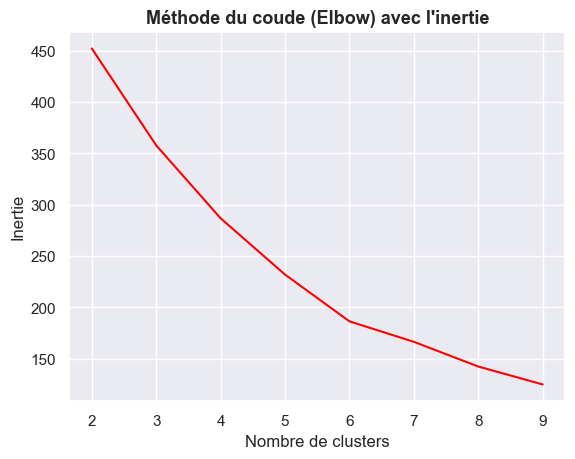

In [34]:
inertia_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,n_init=10, init='k-means++',random_state=30)
    kmeans.fit(X_proj)
    labels = kmeans.labels_
    inertia_scores.append(kmeans.inertia_)
    
plt.plot(range(2, 10), inertia_scores, color='red')
plt.title("Méthode du coude (Elbow) avec l'inertie", fontsize=13, fontweight='bold')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

L'inertie diminue très lentement entre 6 et 7 clusters. On peut observer **le coude se former à 6 clusters**.

####
**Coefficient de silhouette**

On cherche à avoir le coefficient le plus élevé qui représente une meilleure classification. 

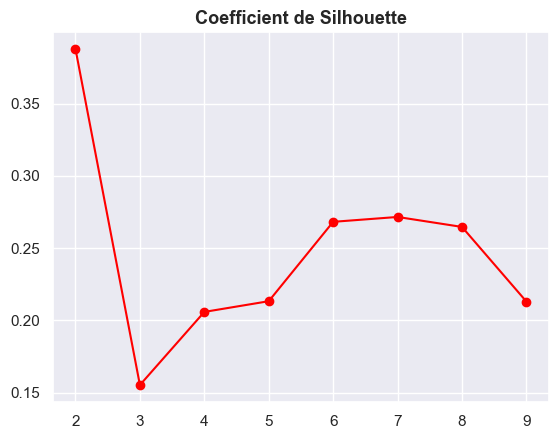

In [35]:
silhouettes = []

for num_clusters in range(2, 10):
    cls = KMeans(n_clusters=num_clusters, 
                         n_init =1, init='random', random_state=30)
    cls.fit(X_scaled)
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)

plt.title('Coefficient de Silhouette', fontsize=13, fontweight='bold')

plt.plot(range(2, 10), silhouettes, marker='o', color='red')

Le graphique nous indique qu'il faut privilégier **6 ou 7 clusters**, valeurs pour lesquelles le coefficient est le plus élevé.

<div style="background-color: RGB(255,245,240); width: 100%; padding: 10px; border: 2px solid RGB(251,4,1); color: RGB(74,63,53);">

- Méthode du coude (Elbow) : 6 clusters.
- Coefficient de Silouhette : 6 ou 7 clusters. 
    
On peut fixer le nombre de clusters à 6. 

###
---
<h3 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
ACP <a class='anchor' id='acp'></a> </h3>

L'ACP nous sert pour visualiser les clusters sur 3 dimensions.

In [36]:
#Pourcentage de variance expliquée par les 6 premières composantes
pca2 = decomposition.PCA(n_components=6)
pca2.fit(X_scaled)
print(pca2.explained_variance_ratio_.cumsum())
X_proj2 = pca.transform(X_scaled)

[0.25210967 0.42826021 0.54738951 0.66050415 0.76430427 0.84673479]


In [37]:
#Définition d'une variable avec la liste des composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

Les 6 premières composantes expliquent 85% de la variance. Elles peuvent donc représenter les données. 

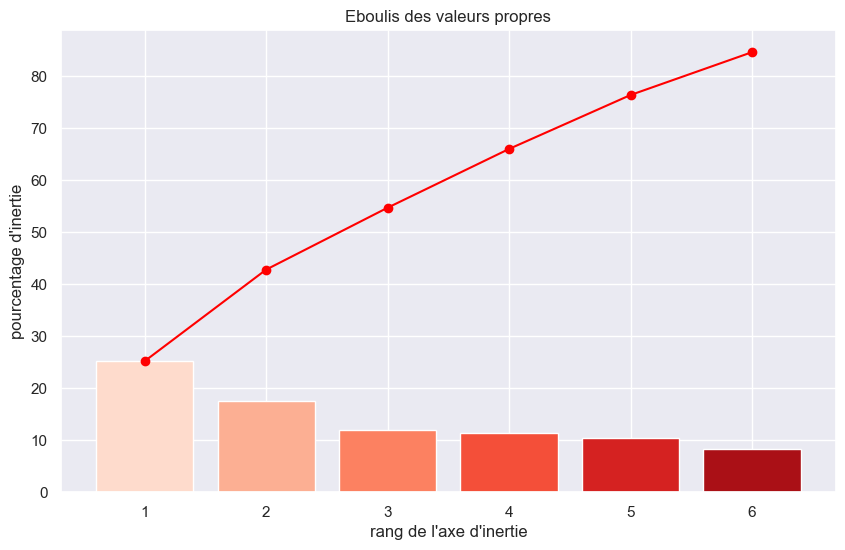

In [38]:
#Définition d'une variable avec la liste des composantes
varexpl = pca.explained_variance_ratio_*100
cumulative_var = varexpl.cumsum()
cumulative_var = np.append(cumulative_var, 100)

colors = sns.color_palette("Reds", len(x_list))
 
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(varexpl))+1, varexpl, color=colors)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

###
---
<h3 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Clustering <a class='anchor' id='clustering'></a> </h3>

In [39]:
#Nombre de clusters 
km = 6

In [40]:
# Clustering par K-means avec librairie sklearn sur les données centrées réduites
kmeans = KMeans(n_clusters=km, random_state=30)
kmeans.fit(X_proj)

KMeans(n_clusters=6, random_state=30)

In [41]:
# Récupération des clusters attribués à chaque individu
clus_kmeans = kmeans.labels_ + 1
clus_kmeans

array([3, 2, 1, 2, 3, 5, 3, 3, 3, 3, 5, 1, 2, 3, 4, 2, 5, 4, 5, 3, 3, 2,
       6, 3, 1, 3, 4, 2, 3, 3, 1, 5, 1, 5, 3, 6, 2, 5, 3, 5, 3, 2, 2, 2,
       5, 5, 3, 3, 2, 1, 1, 2, 5, 2, 4, 2, 6, 1, 3], dtype=int32)

In [42]:
#Stockage des centroïdes dans une variable
centroid_km = kmeans.cluster_centers_[:, :2]
centroid_km

array([[ 0.24381471,  0.62972211],
       [-1.43888921,  1.53011162],
       [ 0.03637146, -0.57960966],
       [ 4.46961832,  1.45735004],
       [-0.86184635, -1.86442227],
       [ 3.03490334, -0.25583706]])

In [43]:
#Affichage du nombre de pays par cluster 
unique, counts = np.unique(clus_kmeans, return_counts=True)
dict(zip(unique, counts))

{1: 8, 2: 14, 3: 19, 4: 4, 5: 11, 6: 3}

####
**Attribution des 6 clusters aux pays**

In [44]:
# Index triés des groupes de pays
index = np.argsort(clus_kmeans)

# Création d'un DataFrame avec les noms de pays et leur cluster
df_clus_kmeans = pd.DataFrame(columns=['Cluster_KM', 'Zone'])
df_clus_kmeans['Zone'] = df_final.index[index]
df_clus_kmeans['Cluster_KM'] = clus_kmeans[index]

# Afficher les premières lignes du DataFrame
df_clus_kmeans.head()

,Cluster_KM,Zone
0,1,Chine - RAS de Macao
1,1,Malte
2,1,Autriche
3,1,Irlande
4,1,Suisse


In [45]:
# Liste des pays de chaque cluster
for i in range(1, km + 1):
    clus_pays = df_clus_kmeans.loc[df_clus_kmeans['Cluster_KM'] == i, df_clus_kmeans.columns[1]]
    print('K-Means - Cluster ' + str(i) + ': ' + str(len(clus_pays)) + ' pays')
    print(clus_pays.values)
    print('-' * 100)

K-Means - Cluster 1: 8 pays
['Chine - RAS de Macao' 'Malte' 'Autriche' 'Irlande' 'Suisse' 'Suède'
 'Luxembourg' 'Danemark']
----------------------------------------------------------------------------------------------------
K-Means - Cluster 2: 14 pays
['Saint-Kitts-et-Nevis' 'Sainte-Lucie' 'Polynésie française'
 'Saint-Vincent-et-les Grenadines' 'Koweït' 'Nouvelle-Calédonie'
 'Suriname' 'Trinité-et-Tobago' 'Émirats arabes unis' 'Samoa' 'Bahamas'
 'Antigua-et-Barbuda' 'Dominique' 'Grenade']
----------------------------------------------------------------------------------------------------
K-Means - Cluster 3: 19 pays
['Albanie' 'Tchéquie' 'Roumanie' 'Slovaquie' 'Namibie' 'Slovénie'
 'Lituanie' 'Monténégro' 'Kazakhstan' 'Botswana' 'Croatie' 'Bulgarie'
 'Cabo Verde' 'Grèce' 'Cuba' 'Kiribati' 'Chypre' 'Estonie' 'Lettonie']
----------------------------------------------------------------------------------------------------
K-Means - Cluster 4: 4 pays
["Royaume-Uni de Grande-Bretagne et d

In [46]:
#Jointure entre df final et df des clusters Kmeans
df_final_km = pd.merge(df_final, df_clus_kmeans, on='Zone')

#Export
df_final_km.to_csv('df_final_clus_km.csv')
df_final_km.head()

,Zone,Population,TAS,TDI,Exportations - Qté,Production,PIB / hab ($),Dispo. Alim. Volailles (kcal/pers),Prop. Prot. Volailles (%) / jour,Evolution population (%),Stabilité Politique,Croissance PIB (%),Prix à la Conso,Cluster_KM
0,Albanie,2884169.0,27.66,80.85,0.0,13.0,4521.752217,31025.0,9.44,-0.22,0.38,9.77,107.31,3
1,Antigua-et-Barbuda,95426.0,0.00,100.00,0.0,0.0,16110.556281,85045.0,32.88,1.99,0.75,2.19,101.72,2
2,Autriche,8819901.0,85.55,63.58,78.0,148.0,47429.535841,23725.0,11.54,1.63,1.05,5.48,103.12,1
3,Bahamas,381755.0,23.08,92.31,0.0,6.0,30969.876197,66430.0,34.79,2.02,0.99,4.42,98.93,2
4,Botswana,2205080.0,71.43,42.86,0.0,5.0,6705.339802,4380.0,4.50,3.98,1.02,6.78,106.20,3


###
---
<h3 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Visualisation des clusters <a class='anchor' id='visualisation-des-clusters'></a> </h3>

####
---
**Boxplots**

In [47]:
df_box_km = df_final_km.sort_values('Cluster_KM')

def boxplot_cluster(var):
    data_boxplot = []
    groupes = df_box_km['Cluster_KM'].unique()
    
    for groupe in groupes :
        subset = df_box_km[df_box_km.Cluster_KM == groupe]
        data_boxplot.append(subset[var])

    fig, ax1 = plt.subplots(figsize=(8, 6))
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data_boxplot, notch=0, vert=1, whis=1.5)

    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.4)
    ax1.set_axisbelow(True)
    ax1.set_title(("Méthode K-Means : Distribution de " + var +" par Cluster"), fontsize=12, fontweight='bold')
    ax1.set_ylabel(var)
    ax1.set_xlabel("Clusters K-Means")
    ax1.set_xlim(0, len(data_boxplot) + 0.5)

    plt.show()

#####
**Évolution population (%)**

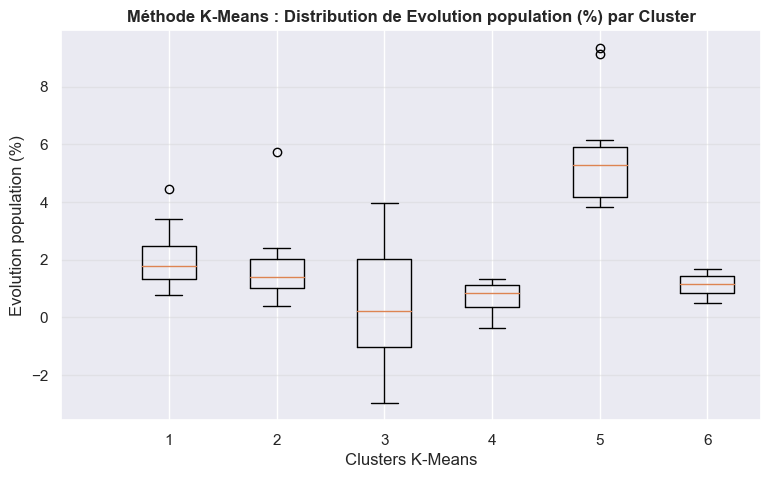

In [48]:
boxplot_cluster('Evolution population (%)')    

Le **cluster 5** est celui contenant les pays ayant **la plus grande évolution de leur population**. 

#####
**Population**

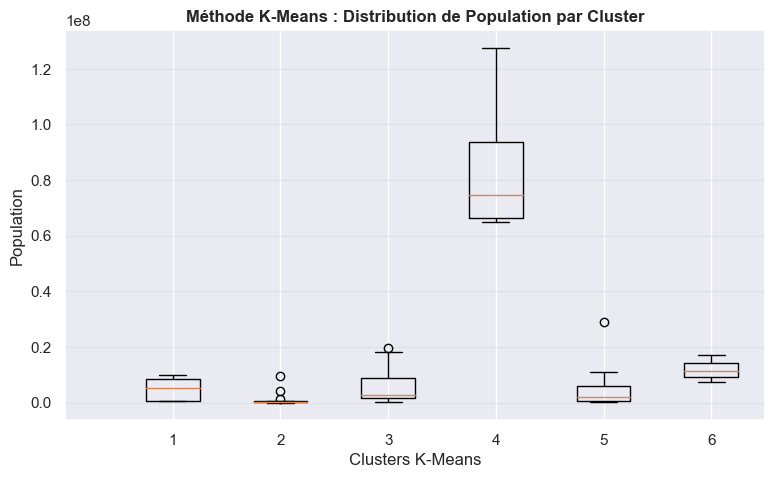

In [49]:
boxplot_cluster('Population')    

Le **cluster 4** contient les pays les **plus peuplés**. 

#####
**Disponibilité alimentaire volailles**

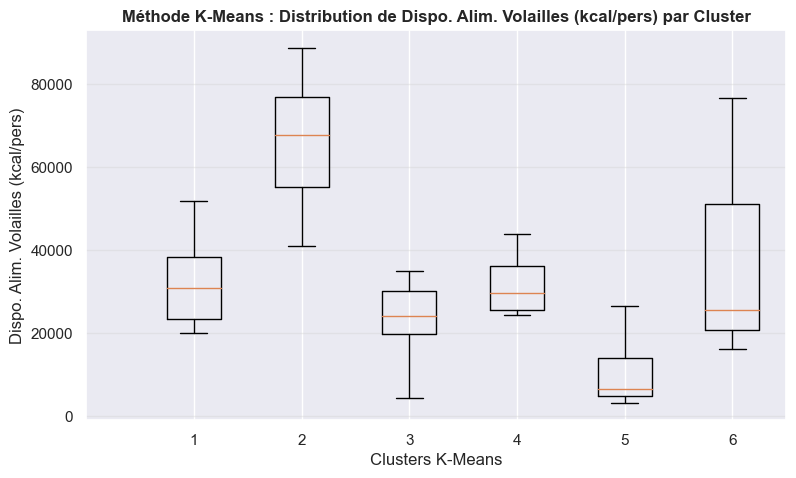

In [50]:
boxplot_cluster('Dispo. Alim. Volailles (kcal/pers)')    

Le **cluster 2** est celui qui possède les pays ayant **la plus forte consommation de volailles** contrairement au **cluster 5** qui a **la plus faible**. 

#####
**PIB / hab ($)**

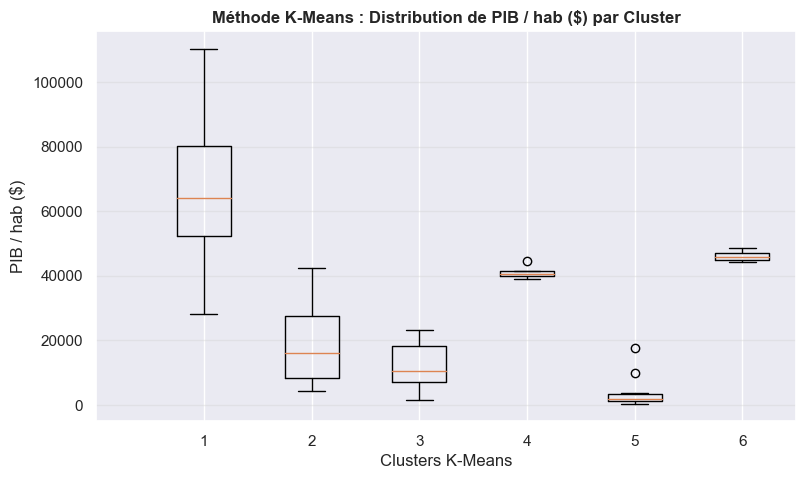

In [51]:
boxplot_cluster('PIB / hab ($)')    

Le **cluster 1** contient les pays ayant le **meilleur niveau de vie** contrairement au **cluster 5** contenant les **pays les moins riches**. 

#####
**Croissance PIB (%)**

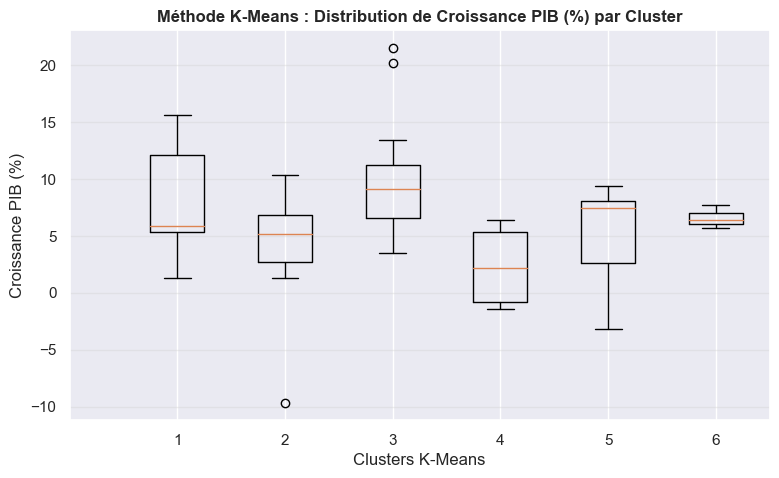

In [52]:
boxplot_cluster('Croissance PIB (%)')    

#####
**Exportations**

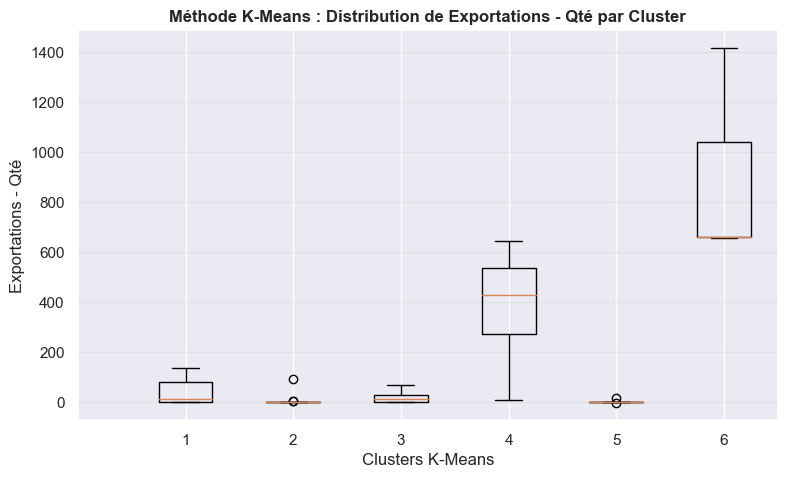

In [53]:
boxplot_cluster('Exportations - Qté')    

Le **cluster 6** contient les pays qui **exportent le plus de volailles** suivi ensuite du **cluster 4**. 

#####
**TDI**

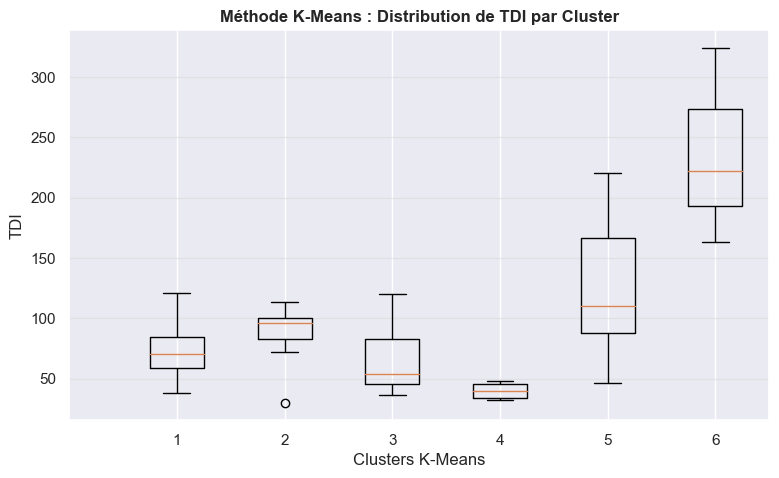

In [54]:
boxplot_cluster('TDI')    

Les pays les **plus dépendants des importations de volailles** se trouvent dans le **cluster 6** suivi du **cluster 5**. La médiane du TDI du cluster 2 atteint quasiment les 100%. 

#####
**TAS**

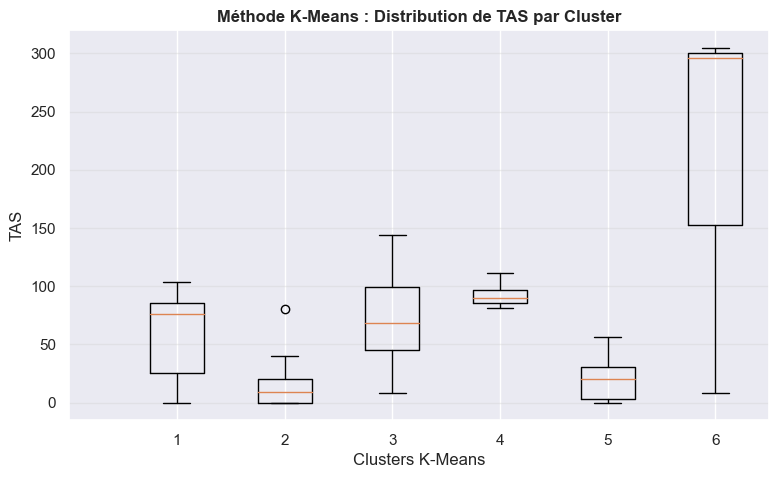

In [55]:
boxplot_cluster('TAS')    

Les **pays étant autosuffisants** se trouvent dans le **cluster 6**. Ceux ne **l'étant pas** se trouvent dans les **clusters 2 et 5**. 

#####
**Production**

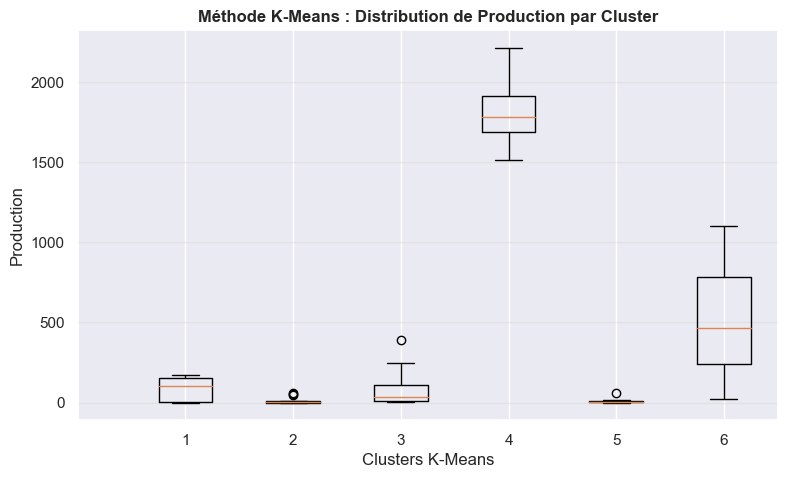

In [56]:
boxplot_cluster('Production')    

Les pays les plus producteurs sont dans le cluster 4. Ceux ne produisant pas de volailles se trouvent dans les clusters 2 et 5. 

#####
<div style="background-color: RGB(255,245,240); width: 100%; padding: 10px; border: 2px solid RGB(251,4,1); color: RGB(74,63,53);">
    
**OBSERVATIONS**

À première vue, grâce aux **boxplots**, nous souhaitons exporter vers des pays qui : 
    
- sont assez peuplés : cluster **4** 
- ont une bonne croissance démographique : clusters **5**
- ont une grande disponibilité alimentaire : cluster **2**
- ont une faible disponibilité alimentaire : cluster **5**
- ont une population avec un bon niveau de vie : clusters **1**
- exportent peu ou pas de volailles : clusters **2, 3 et 5**
- sont dépendants aux importations : clusters **5 et 6**
- ne sont pas autosuffisants : clusters **2 et 5**
- ne produisent pas ou peu de volailles : clusters **2 et 5**
    
Les pays représentant le plus d'opportunités pour exporter les volailles sont dans les **clusters 2 et 5**. 

###
---
<h3 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Analyse des centroïdes <a class='anchor' id='analyse-des-centroides'></a> </h3>

In [57]:
#Regroupement des données par cluster et calcul de leur centroïde (moyenne)
df_centroide_km = df_final_km.iloc[:,:14].groupby('Cluster_KM').mean()
df_centroide_km

,Population,TAS,TDI,Exportations - Qté,Production,PIB / hab ($),Dispo. Alim. Volailles (kcal/pers),Prop. Prot. Volailles (%) / jour,Evolution population (%),Stabilité Politique,Croissance PIB (%),Prix à la Conso
Cluster_KM,,,,,,,,,,,,
1,4.914823e+06,58.977500,73.646250,42.250000,85.750000,66282.891923,32256.875000,14.670000,2.096250,1.146250,7.942500,102.653750
2,1.232057e+06,15.855000,89.872857,7.357143,13.214286,18225.102137,66612.500000,35.519286,1.737143,0.617143,4.251429,108.275714
3,5.534737e+06,73.807368,66.520000,19.473684,81.210526,12142.046076,24109.210526,14.410526,0.461053,0.553684,9.915789,99.374211
4,8.543278e+07,92.807500,39.932500,379.000000,1823.250000,41168.750959,31937.500000,16.027500,0.650000,0.592500,2.347500,101.962500
5,5.513362e+06,20.978182,124.509091,1.363636,9.727273,4020.168295,10253.181818,13.641818,5.602727,0.266364,5.090909,108.484545
6,1.191581e+07,202.960000,236.580000,912.333333,529.000000,46191.646489,39420.000000,14.100000,1.110000,0.420000,6.580000,108.160000


In [58]:
# Centrage-réduction des variables pour analyse - utilisation du modéle déjà entraîné
df_centroide_km = pd.DataFrame(scaler.fit_transform(df_centroide_km.values),
                                   index = np.unique(clus_kmeans),
                                   columns = features )
df_centroide_km

,Population,TAS,TDI,Exportations - Qté,Production,PIB / hab ($),Dispo. Alim. Volailles (kcal/pers),Prop. Prot. Volailles (%) / jour,Evolution population (%),Stabilité Politique,Croissance PIB (%),Prix à la Conso
1,-0.475140,-0.298098,-0.492223,-0.553114,-0.519275,1.610407,-0.107452,-0.432488,0.088506,2.009197,0.777158,-0.596414
2,-0.598578,-0.989704,-0.238910,-0.657599,-0.630732,-0.604325,1.897388,2.226222,-0.118702,0.065462,-0.715986,0.952536
3,-0.454362,-0.060254,-0.603471,-0.621316,-0.526250,-0.884661,-0.582913,-0.465577,-0.855016,-0.167661,1.575411,-1.499985
4,2.223640,0.244474,-1.018529,0.455267,2.150534,0.453028,-0.126089,-0.259379,-0.745992,-0.025067,-1.486179,-0.786865
5,-0.455078,-0.907538,0.301797,-0.675546,-0.636090,-1.258956,-1.391489,-0.563603,2.111771,-1.223166,-0.376392,1.010073
6,-0.240483,2.011119,2.051336,2.052307,0.161814,0.684507,0.310556,-0.505175,-0.480568,-0.658765,0.225988,0.920655


####
**Projection des individus**

Nous allons à présent projeter les clusters sur les 3 premiers plans factoriels.

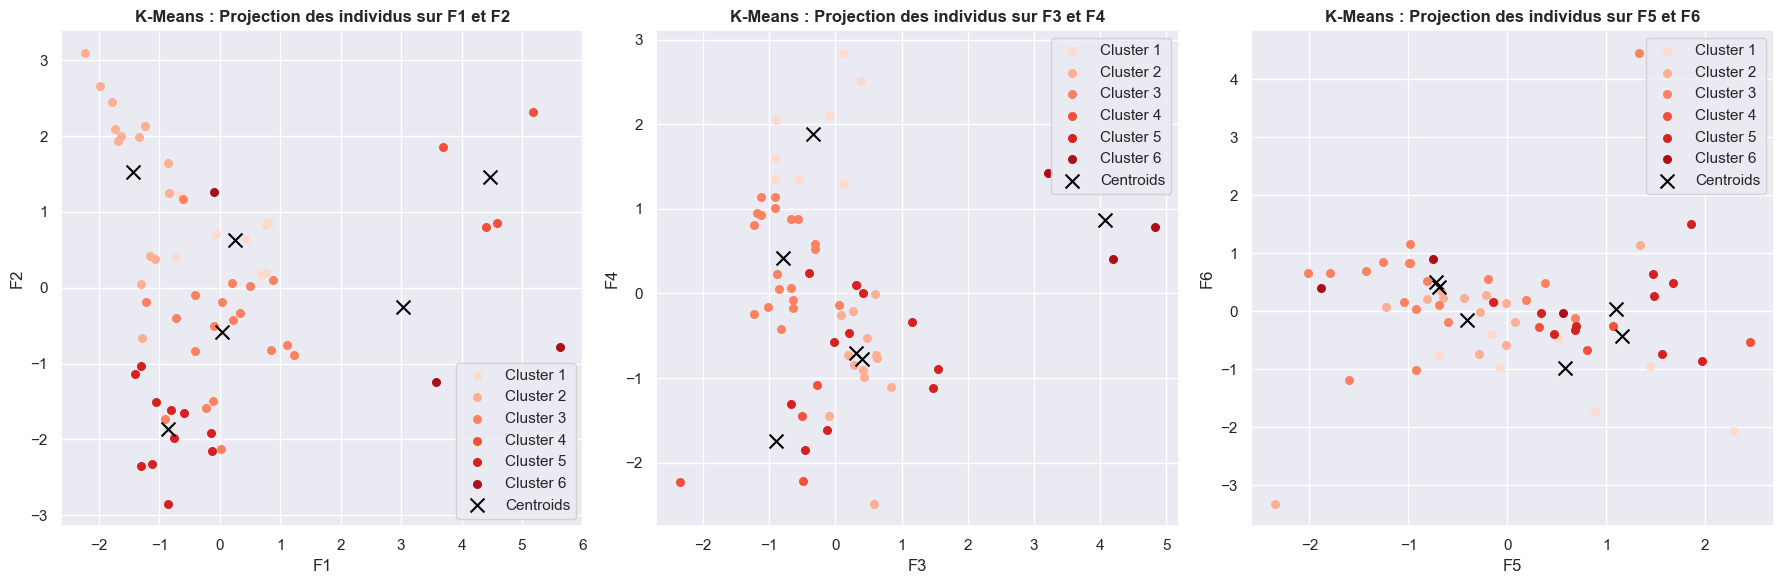

In [59]:
def plot_cluster_projections(X_proj, pca, kmeans, cluster_kmeans, palette='Reds'):
    """
    Plot cluster projections on the first three principal components.

    Parameters:
    - X_proj: projected data after PCA
    - pca: fitted PCA model
    - kmeans: fitted KMeans model
    - cluster_labels: cluster labels assigned by KMeans
    - palette: color palette for clusters (default is 'Reds')

    Returns:
    - None
    """

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Clusters sur les 3 premiers plans factoriels
    unique_labels = np.unique(clus_kmeans)
    colors = sns.color_palette(palette, len(unique_labels))

    for i, ax in enumerate(axes):
        d1, d2 = i * 2, i * 2 + 1
        
        # Plot each cluster with its specific color
        for cluster_idx, color in zip(unique_labels, colors):
            selected = cluster_kmeans == cluster_idx
            ax.scatter(X_proj[selected, d1], X_proj[selected, d2], label=f'Cluster {cluster_idx}', color=color, s=30)

        # Plot centroids
        centroids = kmeans.cluster_centers_[:, [d1, d2]]
        ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')

        # Set labels and title
        ax.set_xlabel(f'F{d1+1}')
        ax.set_ylabel(f'F{d2+1}')
        ax.set_title(f'K-Means : Projection des individus sur F{d1+1} et F{d2+1}', fontsize=12, fontweight='bold')
        
        ax.legend()

    plt.tight_layout()
    plt.show()

# Utilisation de la fonction
plot_cluster_projections(X_proj, pca, kmeans, clus_kmeans)

<div style="background-color: RGB(255,245,240); width: 100%; padding: 10px; border: 2px solid RGB(251,4,1); color: RGB(74,63,53);">
    
>**Premier plan factoriel - Pays cibles :** Clusters 1 et 3

>**Deuxième plan factoriel - Pays cibles :** Cluster 6 

>**Troisième plan factoriel - Pays cibles :** Clusters 5 et 4

####
**Heatmap**

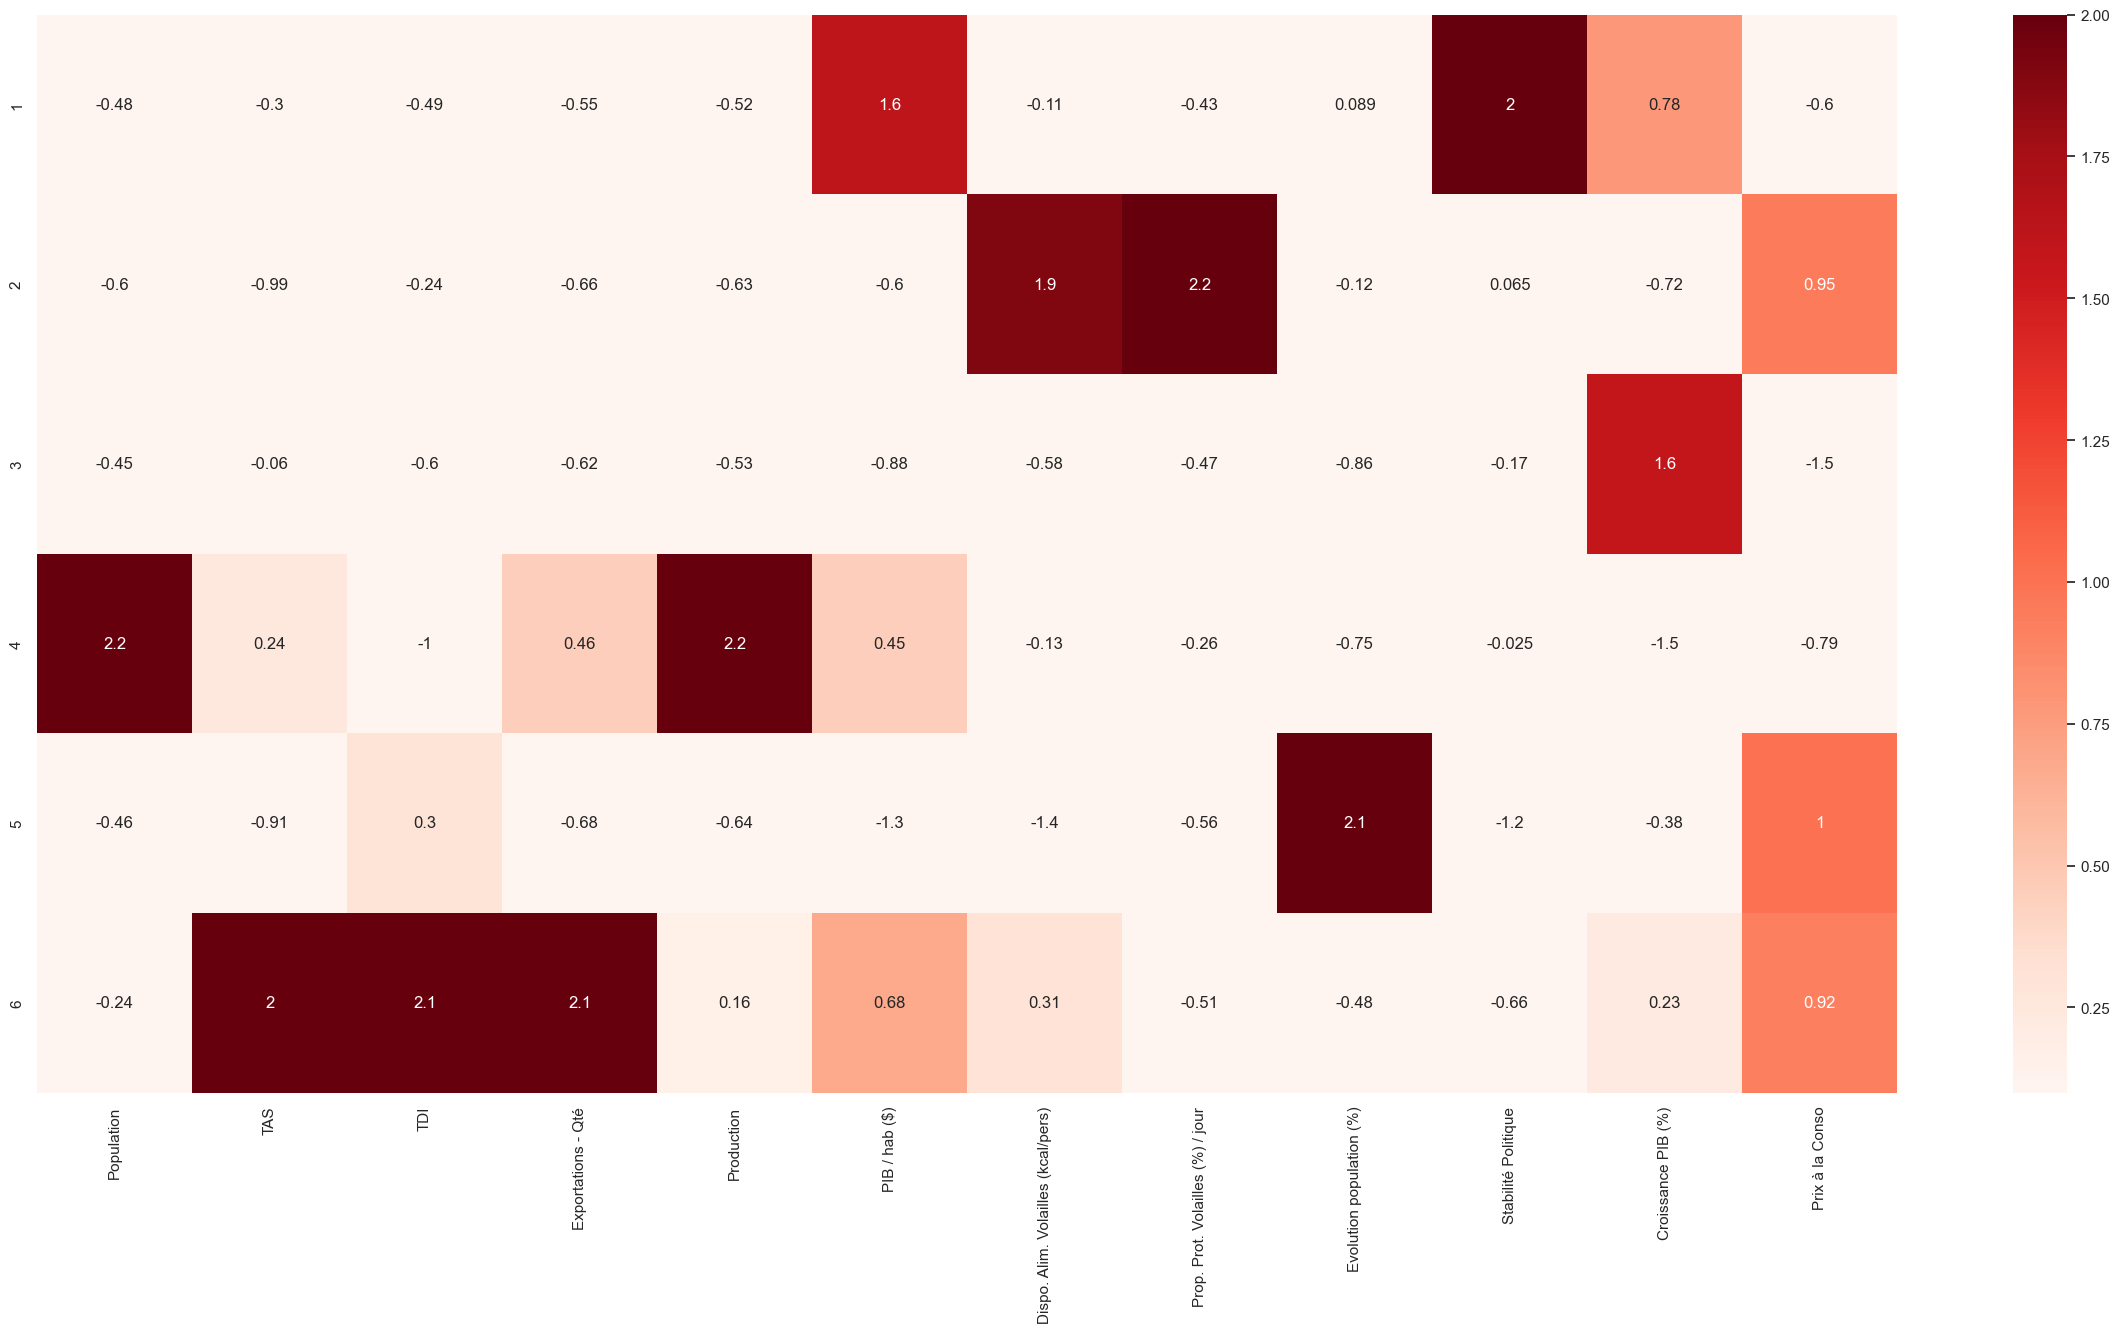

In [60]:
fig, ax = plt.subplots(1,1, figsize=(30,14))
ax = sns.heatmap(df_centroide_km, vmin=0.1, vmax=2, annot=True, cmap="Reds")

<div style="background-color: RGB(255,245,240); width: 100%; padding: 10px; border: 2px solid RGB(251,4,1); color: RGB(74,63,53);">
    
**OBSERVATIONS**

**Cluster 1 :** 
- Centroïde élevé dans : PIB, Croissance PIB et Stabilité politique
- Centroïde faible dans : Exportations et Production
    
**Cluster 2 :** 
- Centroïde élevé dans : Dispo. Alim. Volailles, Prop. Prot. Volailles et Prix à la Conso.
- Centroïde faible dans : TAS et Croissance PIB
    
**Cluster 3 :** 
- Centroïde élevé dans : Croissance PIB
- Centroïde faible dans : PIB / hab, Évolution population et Prix à la Conso.
    
**Cluster 4 :** 
- Centroïde élevé dans : Population et Production
- Centroïde faible dans : TDI et Croissance PIB
    
**Cluster 5 :** 
- Centroïde élevé dans : Évolution population et Prix à la Conso.
- Centroïde faible dans : PIB / hab, Dispo. Alim. Volailles et Stabilité politique
    
**Cluster 6 :** 
- Centroïde élevé dans : TAS, TDI et Exportations
- Centroïde faible dans : Prop. Prot. Volailles et Stabilité politique

####
**Radar plot**

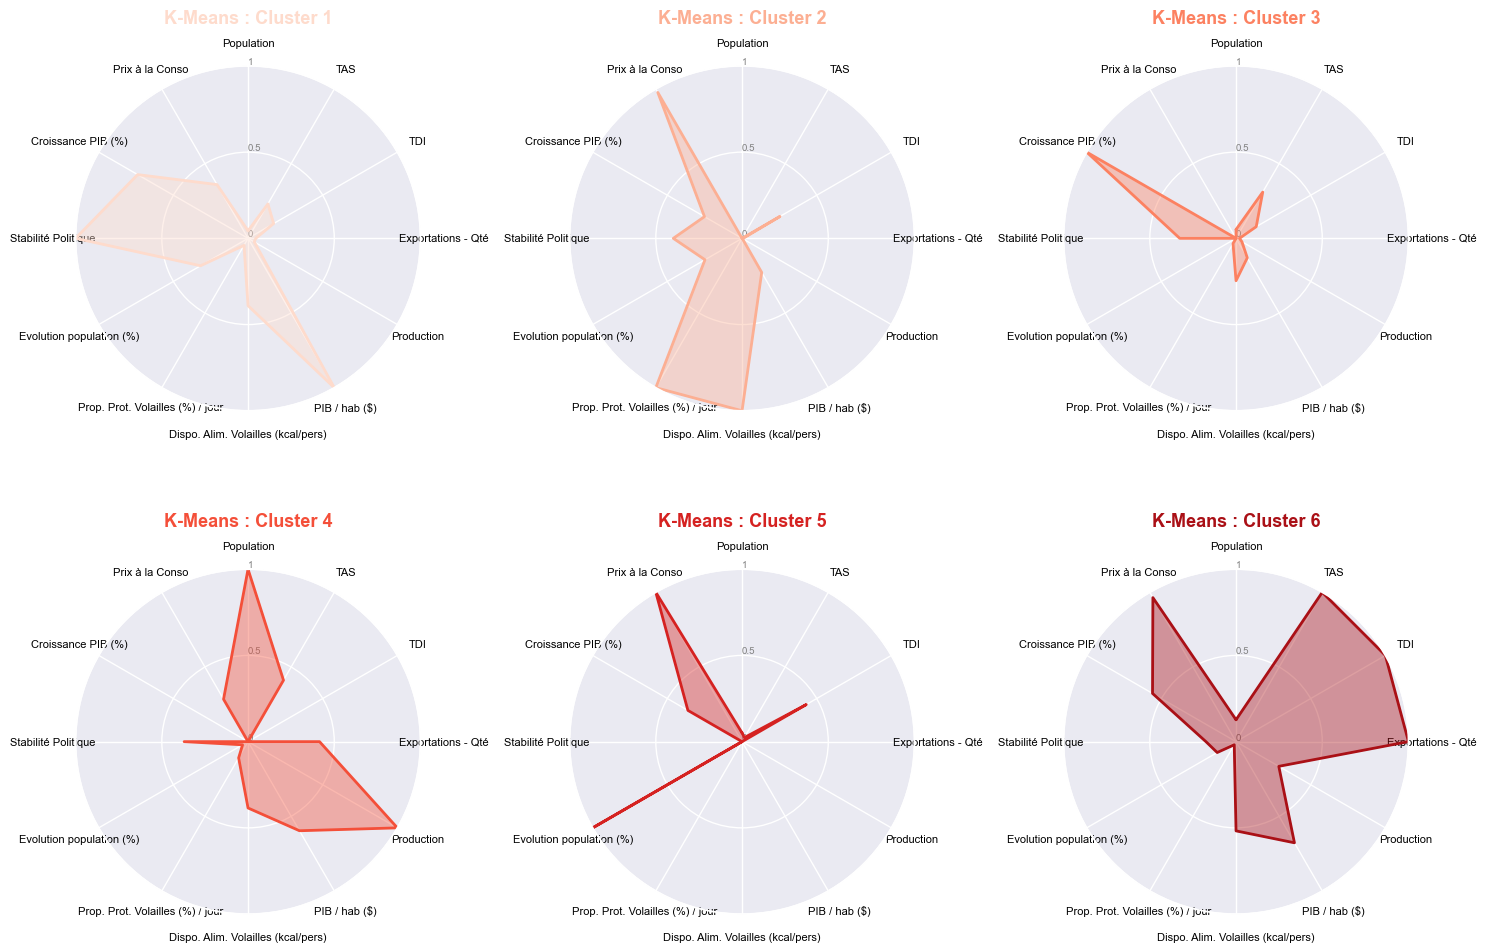

In [61]:
data = df_centroide_km.reset_index()
data = data.rename(columns={'index':'Cluster'})

# Normalisation des données
data_normalized = (data.iloc[:, 1:] - data.iloc[:, 1:].min()) / (data.iloc[:, 1:].max() - data.iloc[:, 1:].min())


plt.figure(figsize=(15, 15))
colors= sns.color_palette('Reds', len(data.index))

# Nombre de variables
categories = list(data_normalized.columns)
N = len(categories)

# Angles pour chaque axe
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Boucle pour tracer les graphes pour chaque cluster
for i in range(len(data_normalized)):
    ax = plt.subplot(3, 3, i + 1, polar=True)  # Ajuster les subplots selon le nombre de clusters
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], categories, color='black', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([0, 0.5, 1], ["0", "0.5", "1"], color="grey", size=7)
    plt.ylim(0, 1)

    values = data_normalized.iloc[i].values.flatten().tolist()
    values += values[:1]
    
    ax.plot(angles, values, color=colors[i], linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=colors[i], alpha=0.4)

    plt.title('K-Means : Cluster ' + str(data['Cluster'][i]), weight='bold', size=13, color=colors[i], y=1.1)

plt.tight_layout()
plt.show()

**OBSERVATIONS**

---

| Cluster | Nb Pays | Population |Évol. Pop. | Autosuffisance | Dépendance Import. | Export. | Production | Consommation | PIB | Croissance PIB | Conclusion |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
| **1** | 8 | **-** | **+** | **+** | **+** | **-** | **-** | **++** | **+++** | **++** | **OUI** : TDI, consommation de volailles, bon niveau de vie, croissance économique et démographique |
| **2** | 14 | **-** | **+** | **-** | **+** | **-** | **-** | **+++** | **-** | **+** | **OUI** : TDI, grande consommation de volailles, croissances démographique et économique |
| **3** | 19 | **-** | **-** | **+** | **+** | **-** | **-** | **+** | **-** | **+++** | **NON** : Autosuffisance, pas de croissance démographique |
| **4** | 4 | **+++** | **-** | **++** | **-** | **++** | **+++** | **++** | **++** | **-** | **NON** : Autosuffisants, exportateurs et producteurs |
| **5** | 11 | **-** | **+++** | **-** | **++** | **-** | **-** | **-** | **-** | **++** | **OUI** : Croissance démographique, TDI et croissance économique |
| **6** | 3 | **-** | **+** | **+++** | **+++** | **+++** | **+** | **++** | **++** | **++** | **NON** : Autosuffisants, exportateurs et producteurs |

###
---
<h3 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Sélection des pays via K-Means <a class='anchor' id='selection-des-pays-via-k-means'></a> </h3>

<div style="background-color: RGB(255,245,240); width: 100%; padding: 10px; border: 2px solid RGB(251,4,1); color: RGB(74,63,53);">

**Méthode K-Means** - Les pays les plus intéressants pour exporter les poulets sont ceux figurant dans les clusters suivants : 

**Cluster 1 : 8 pays**
- Pays  dépendants des importations de volailles, on peut y répondre en exportant. 
- Pays ayant une consommation de volailles déjà existante, il y a donc une demande existante.
- Pays en croissance économique et démographique, ayant une population avec un bon niveau de vie. C'est une opportunité pour se développer. 
        
** **
    
**Cluster 2 : 14 pays**    
- Pays dépendants des importations de volailles, on peut y répondre en exportant. 
- Pays ayant une bonne croissance démographique (évolution de la population). 
- Pays avec une forte consommation de volailles, la demande est existante.
- Pays en croissance économique.
     
** **
    
**Cluster 5 : 11 pays**     
- Pays dépendants des importations de volailles, on peut y répondre en exportant. 
- Pays avec une faible consommation de volailles, dans ce cas le marché est sûrement sous-exploité et il y a peu de concurrence ce qui représente une réelle opportunité de croissance
 - Pays en croissance économique et ayant une population avec un bon niveau de vie. C'est une opportunité pour se développer. 
- Pays ayant une forte croissance démographique (évolution de la population). 


## 
<h2 style="margin: auto; padding: 20px; color: RGB(251,4,1); ">
III. Comparaison des deux méthodes <a class='anchor' id='III.-comparaison-des-deux-methodes'></a> </h2>

###
---
<h3 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Comparaison des centroïdes <a class='anchor' id='comparaison-des-centroides'></a> </h3>

In [62]:
# Df avec les caractéristiques des centroïdes CAH et k-means
df_centroide_clus_1 = df_centroide_km.reset_index()
df_centroide_clus_1['index'] = df_centroide_clus_1['index'].replace([1,2,3,4,5],
                                                            ['kmeans_1','kmeans_2','kmeans_3','kmeans_4','kmeans_5'])

df_centroide_clus_2 = df_centroide_cah.reset_index()
df_centroide_clus_2['index'] = df_centroide_clus_2['index'].replace([1,2,3,4,5],
                                                            ['CAH_1','CAH_2','CAH_3','CAH_4','CAH_5'])

df_centroide_clus = pd.concat([df_centroide_clus_1,df_centroide_clus_2],ignore_index=True)
df_centroide_clus = df_centroide_clus.melt(id_vars = 'index', value_vars = df_centroide_clus.columns[1:])

df_centroide_clus

,index,variable,value
0,kmeans_1,Population,-0.475140
1,kmeans_2,Population,-0.598578
2,kmeans_3,Population,-0.454362
3,kmeans_4,Population,2.223640
4,kmeans_5,Population,-0.455078
...,...,...,...
127,CAH_1,Prix à la Conso,0.655156
128,CAH_2,Prix à la Conso,-0.929818
129,CAH_3,Prix à la Conso,0.990634
130,CAH_4,Prix à la Conso,0.752992


#####
**Visualisation**

In [63]:
# Définition de la fonction pour comparer les listes de pays par cluster
def compare_lists(row):
    km_list = row['K-Means'] if isinstance(row['K-Means'], list) else []
    cah_list = row['CAH'] if isinstance(row['CAH'], list) else []
    return list(set(km_list) - set(cah_list))

# Création de df avec les listes de pays par cluster
df_km = df_final_km.groupby('Cluster_KM')['Zone'].apply(list).reset_index()
df_km.rename(columns={'Cluster_KM': 'Cluster', 'Zone': 'K-Means'}, inplace=True)

df_cah = df_final_cah.groupby('Cluster_CAH')['Zone'].apply(list).reset_index()
df_cah.rename(columns={'Cluster_CAH': 'Cluster', 'Zone': 'CAH'}, inplace=True)

df_cluster = df_km.merge(df_cah, how='left', on='Cluster') 

# Remplir les NaN avec des listes vides
df_cluster['K-Means'] = df_cluster['K-Means'].apply(lambda x: x if isinstance(x, list) else [])
df_cluster['CAH'] = df_cluster['CAH'].apply(lambda x: x if isinstance(x, list) else [])

# Appliquer la fonction à chaque ligne du DataFrame
df_cluster['Pays différents'] = df_cluster.apply(compare_lists, axis=1)

# Compter le nombre de pays différents
df_cluster['Nombre pays différents'] = df_cluster['Pays différents'].apply(len)

df_cluster

,Cluster,K-Means,CAH,Pays différents,Nombre pays différents
0,1,"[Autriche, Danemark, Irlande, Chine - RAS de M...","[Pays-Bas, Belgique]","[Malte, Suède, Autriche, Chine - RAS de Macao,...",8
1,2,"[Antigua-et-Barbuda, Bahamas, Dominique, Polyn...","[France, Allemagne, Japon, Royaume-Uni de Gran...","[Bahamas, Koweït, Grenade, Trinité-et-Tobago, ...",14
2,3,"[Albanie, Botswana, Bulgarie, Cabo Verde, Cuba...","[Antigua-et-Barbuda, Bahamas, Dominique, Polyn...","[Namibie, Lettonie, Lituanie, Croatie, Botswan...",19
3,4,"[France, Allemagne, Japon, Royaume-Uni de Gran...","[Botswana, Îles Salomon, Cabo Verde, Bénin, Ga...",[Royaume-Uni de Grande-Bretagne et d'Irlande d...,4
4,5,"[Îles Salomon, Bénin, Gambie, Ghana, Maldives,...","[Albanie, Autriche, Bulgarie, Cuba, Chypre, Da...","[Vanuatu, Timor-Leste, Mongolie, Sao Tomé-et-P...",11
5,6,"[Chine - RAS de Hong-Kong, Pays-Bas, Belgique]",[],"[Chine - RAS de Hong-Kong, Pays-Bas, Belgique]",3


In [64]:
for index, row in df_cluster.iterrows():
    print(f"Pour l'index {index}, les pays différents sont : {row['Pays différents']}")

Pour l'index 0, les pays différents sont : ['Malte', 'Suède', 'Autriche', 'Chine - RAS de Macao', 'Irlande', 'Danemark', 'Suisse', 'Luxembourg']
Pour l'index 1, les pays différents sont : ['Bahamas', 'Koweït', 'Grenade', 'Trinité-et-Tobago', 'Dominique', 'Saint-Kitts-et-Nevis', 'Samoa', 'Antigua-et-Barbuda', 'Polynésie française', 'Émirats arabes unis', 'Nouvelle-Calédonie', 'Suriname', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie']
Pour l'index 2, les pays différents sont : ['Namibie', 'Lettonie', 'Lituanie', 'Croatie', 'Botswana', 'Tchéquie', 'Albanie', 'Kazakhstan', 'Kiribati', 'Slovaquie', 'Bulgarie', 'Slovénie', 'Estonie', 'Grèce', 'Chypre', 'Cabo Verde', 'Monténégro', 'Cuba', 'Roumanie']
Pour l'index 3, les pays différents sont : ["Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'France', 'Allemagne', 'Japon']
Pour l'index 4, les pays différents sont : ['Vanuatu', 'Timor-Leste', 'Mongolie', 'Sao Tomé-et-Principe', 'Îles Salomon', 'Bénin', 'Oman', 'Sierra Leone', 'Maldiv

In [65]:
df_compare = pd.merge(df_final_cah[['Zone','Cluster_CAH']], df_final_km[['Zone','Cluster_KM']],
                     on='Zone', how='outer')
df_compare

,Zone,Cluster_CAH,Cluster_KM
0,Albanie,5,3
1,Antigua-et-Barbuda,3,2
2,Autriche,5,1
3,Bahamas,3,2
4,Botswana,4,3
5,Îles Salomon,4,5
6,Bulgarie,5,3
7,Cabo Verde,4,3
8,Cuba,5,3
9,Chypre,5,3


La totalité des clusters sont différents.

###
---
<h3 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Qualité des résultats des 2 méthodes <a class='anchor' id='qualite-des-resultats-des-2-methodes'></a> </h3>

In [66]:
silh_score_kmeans = silhouette_score(X_proj, clus_kmeans)
print("Indice de silhouette pour la méthode du k-means : ", round(silh_score_kmeans,2))

silh_score_CAH = silhouette_score(X_proj, clus_cah)
print("Indice de silhouette pour la méthode du CAH : ", round(silh_score_CAH,2))

Indice de silhouette pour la méthode du k-means :  0.35
Indice de silhouette pour la méthode du CAH :  0.33


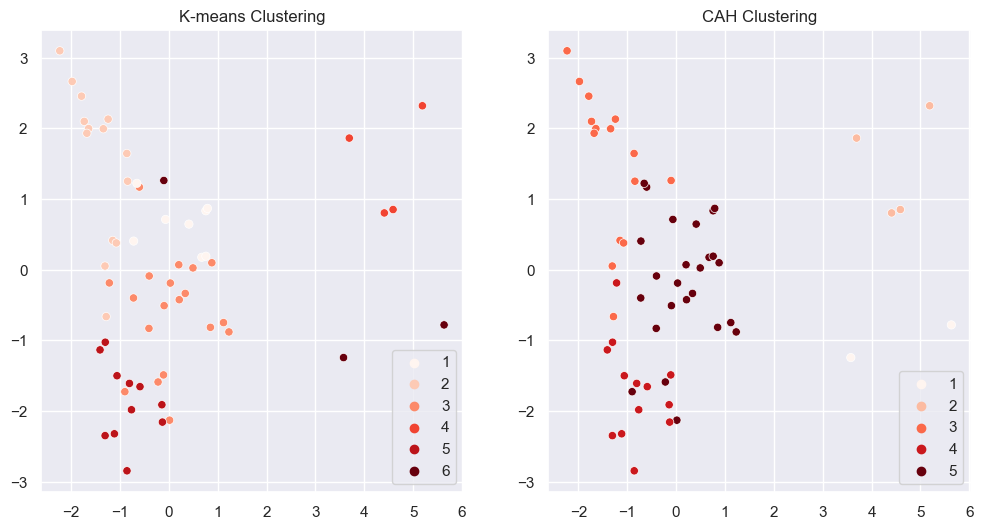

In [67]:
#Visualisation 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x=X_proj[:, 0], y=X_proj[:, 1], hue=clus_kmeans, palette='Reds', ax=axes[0])
axes[0].set_title('K-means Clustering')
sns.scatterplot(x=X_proj[:, 0], y=X_proj[:, 1], hue=clus_cah, palette='Reds', ax=axes[1])
axes[1].set_title('CAH Clustering')
plt.show()

<div style="background-color: RGB(255,245,240); width: 100%; padding: 10px; border: 2px solid RGB(251,4,1); color: RGB(74,63,53);">

Le score de silhouette indique une meilleure qualité des clusters (séparation et cohésion des clusters) avec la méthode K-Means avec un score de 0.35 contre 0.33 pour la méthode CAH. 

**Nous retiendrons donc la méthode K-Means pour réaliser notre sélection finale.**

# <div style="border: 1px solid RGB(251,4,1);" >
<h1 style="margin: auto; padding: 20px; color: RGB(74,63,53); ">
Sélection des pays pour exportation <a class='anchor' id='selection-des-pays-pour exportation'></a> 
</h1> 

In [68]:
#Jointure entre df final et df des clusters
df_final_km = pd.merge(df_final, df_clus_kmeans, on='Zone')

#Export
df_final_km.to_csv('df_final_clus_kmeans.csv')
df_final_km.head()

,Zone,Population,TAS,TDI,Exportations - Qté,Production,PIB / hab ($),Dispo. Alim. Volailles (kcal/pers),Prop. Prot. Volailles (%) / jour,Evolution population (%),Stabilité Politique,Croissance PIB (%),Prix à la Conso,Cluster_KM
0,Albanie,2884169.0,27.66,80.85,0.0,13.0,4521.752217,31025.0,9.44,-0.22,0.38,9.77,107.31,3
1,Antigua-et-Barbuda,95426.0,0.00,100.00,0.0,0.0,16110.556281,85045.0,32.88,1.99,0.75,2.19,101.72,2
2,Autriche,8819901.0,85.55,63.58,78.0,148.0,47429.535841,23725.0,11.54,1.63,1.05,5.48,103.12,1
3,Bahamas,381755.0,23.08,92.31,0.0,6.0,30969.876197,66430.0,34.79,2.02,0.99,4.42,98.93,2
4,Botswana,2205080.0,71.43,42.86,0.0,5.0,6705.339802,4380.0,4.50,3.98,1.02,6.78,106.20,3


## 
<h2 style="margin: auto; padding: 20px; color: RGB(251,4,1); ">
I. Critères de sélection <a class='anchor' id='I.-criteres de selection'></a> </h2>

Pour sélectionner les pays vers lesquels exporter la volaille, nous devons observer les critères suivants : 

- Pays dépendants des importations
- Pays n'étant pas autosuffisants
- Pays qui ne produisent pas ou peu
- Pays qui n'exportent pas ou peu
- PIB par habitant plutôt élevé ou croissance économique (niveau de vie de la population en augmentation)
- Faible disponibilité : marché non-existant, concurrence faible (opportunité de croissance)
- Grande disponibilité : demande existante, concurrence élevée
- Croissance démographique : plus de consommateurs potentiels

## 
<h2 style="margin: auto; padding: 20px; color: RGB(251,4,1); ">
II. Sélection des clusters <a class='anchor' id='II.-selection-des-clusters'></a> </h2>

Nous allons sélectionner les clusters que nous avons mentionnés grâce aux **radars plots** et **boxplots**.

Ce sont les **clusters 1, 2 et 5** qui regroupent au total **33 pays**. 

| Cluster 1 | Cluster 2 | Cluster 5 | 
|:--------:|:--------:|:--------:|
| **8 pays** | **14 pays** | **11 pays** | 
| Non exportateurs (med=0) | Non exportateurs (med=0) | Non exportateurs (med=0) | 
| Peu de productions | Non producteurs (med=0) | Non producteurs (med=0) | 
| Forte disponibilité | Forte disponibilité | Faible disponibilité | 
| PIB / hab élevé | - | - |
| Croissance PIB | Croissance PIB | Croissance PIB | 
| Croissance démographique | Croissance démographique | Forte croissance démographique | 
| TDI | TDI élevé (med=100%) | TDI très élevé (med>100%) |
| - | TAS faible (med<50%) | TAS faible (med<50%) |

In [71]:
df_selection_km = df_final_km[df_final_km['Cluster_KM'].isin([1,2,5])]
df_selection_km

#Export
df_selection_km.to_csv('selection_pays_km.csv')
df_selection_km.head()

,Zone,Population,TAS,TDI,Exportations - Qté,Production,PIB / hab ($),Dispo. Alim. Volailles (kcal/pers),Prop. Prot. Volailles (%) / jour,Evolution population (%),Stabilité Politique,Croissance PIB (%),Prix à la Conso,Cluster_KM
1,Antigua-et-Barbuda,95426.0,0.00,100.00,0.0,0.0,16110.556281,85045.0,32.88,1.99,0.75,2.19,101.72,2
2,Autriche,8819901.0,85.55,63.58,78.0,148.0,47429.535841,23725.0,11.54,1.63,1.05,5.48,103.12,1
3,Bahamas,381755.0,23.08,92.31,0.0,6.0,30969.876197,66430.0,34.79,2.02,0.99,4.42,98.93,2
5,Îles Salomon,636039.0,0.00,200.00,0.0,0.0,2283.581124,6570.0,9.52,5.46,0.20,6.55,99.87,5
10,Bénin,11175198.0,11.18,76.40,0.0,18.0,1095.274459,13505.0,34.61,5.67,0.03,7.45,101.13,5


## 
<h2 style="margin: auto; padding: 20px; color: RGB(251,4,1); ">
III. Recommandations <a class='anchor' id='III.-recommandations'></a> </h2>

Clusters sélectionnés : 

---

| Cluster 1 | Cluster 2 | Cluster 5 |
|:--------:| :--------:| :--------:|
| **6.6% de la population mondiale** | **2.9% de la population mondiale** | **10% de la population mondiale** |
| Chine - RAS de Macao | Saint-Kitts-et-Nevis | Sao Tomé-et-Principe |
| Malte |  Sainte-Lucie | Sierra Leone |
| Autriche | Polynésie française | Ghana |
| Irlande | Saint-Vincent-et-les Grenadines | Bénin |
| Suisse | Koweït | Timor-Leste |
| Suède | Nouvelle-Calédonie | Vanuatu |
| Luxembourg | Suriname | Oman |
| Danemark | Trinité-et-Tobago | Îles Salomon |
|  | Émirats arabes unis | Mongolie |
|  | Samoa | Maldives |
|  | Bahamas | Gambie |
|  | Antigua-et-Barbuda |  |
|  | Dominique |  |
|  | Grenade |  |

---
Je recommande de se diriger en : 

**1e position : Cluster 5**
- Avec 10% de la population mondiale, c'est le plus grand marché potentiel en terme de population
- Avec une très forte dépendance aux importations et une très faible autosuffisance, ces pays nécessites des importations pour satisfaire la demande de volailles. 
- La faible disponibilité de volailles indique un besoin urgent. 
- La croissance démographique assurer une demande croissante à long terme. 

>*Complément d'informations :*
- Certains pays comme Oman et les Madives ont un pouvoir d'achat élevé et une demande croissante pour les produits alimentaires importés. 
- La France a des relations économiques avec plusieurs pays d'Afrique de l'Ouest : Sierra Leone, Ghana, Bénin. Cela peut faciliter les exportations. 

**--> Le Cluster 5 représente une opportunité immédiate et à long terme en raison de leur forte dépendance sur les importations et leur croissance démographique.** 

** **

**2e position : Cluster 2**
- Les pays ont une dépendance élevée aux importations et une faible autosuffisance ce qui créé une demande constante pour les produits importés. 
- Les croissances économique et démographique conduise à une demande croissante. 

>*Complément d'informations :* 
- Les pays du Golfe (Koweït et Émirats Arabes Unis) ont un pouvoir d'achat élevé et une forte demande pour les produits importés. 
- Liens étroits avec la Polynésie française et la Nouvelle-Calédonie ce qui peut faciliter les exportations. 

**--> Malgré une disponibilité de volailles forte, la dépendance des pays aux importations et leurs croissance font du cluster 2 un marché prioritaire après le cluster 5.**

** **

**3e position : Cluster 1**
- Le PIB par habitant élevé et la croissance de ce dernier indiquent une forte capacité d'achat et une demande stable. 
- La légère autosuffisance et la forte disponibilité en volailles montrent que la concurrence est plus forte dans ces pays et que le marché est peut-être moins urgent. 

>*Complément d'informations :*
- Les exportations vers d'autres pays européens sont facilitées par les accords commerciaux au sien de l'UE et la proximité géographique réduisent les coûts logistique. Cela représente un réel avantage. 

**--> Le Cluster 1 bien que stable et capable d'acheter, représente un marché où la compétition est plus intense et le besoin moins urgent comparé aux autres clusters**